In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates
import matplotlib.dates as mdates
import calendar

from dateutil.parser import parse     # package for date parsing




In [2]:
bjg_df = pd.read_csv('data/aqicn/beijing, west park.csv') # Capital city
pzh_df = pd.read_csv('data/aqicn/panzhihua.csv') # Steel industry
szh_df = pd.read_csv('data/aqicn/shuozhou.csv') # Coal center, Shanxi
btu_df = pd.read_csv('data/aqicn/baotou.csv') # REE mining at Bayan Obo
gzh_df = pd.read_csv('data/aqicn/ganzhou.csv')
tsh_df = pd.read_csv('data/aqicn/tangshan.csv')

In [3]:
list_df = [bjg_df, pzh_df, szh_df, btu_df, gzh_df, tsh_df] # Update as needed
list_df_new=[]

for df in list_df:
    data = df.copy()
    data.date = pd.to_datetime(data.date)
    data = data.sort_values(by='date', ascending=False)

    data.columns = ['date','PM25','PM10','O3','NO2','SO2','CO']

    for col in data.columns:
        if col != "date":
            data[col] = pd.to_numeric(data[col], errors='coerce')

    data = data.dropna()
    data = data.sort_values('date', ascending=False)
    
    list_df_new.append(data)

[bjg_df, pzh_df, szh_df, btu_df, gzh_df, tsh_df] = list_df_new # Update as needed


C:\Users\Sehong\AppData\Local\Temp\ipykernel_20616\2067327585.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.date = pd.to_datetime(data.date)


In [4]:
btu_df ['NO2/SO2'] = btu_df['NO2']/btu_df['SO2']

In [5]:
from utils import plot_df, air_pairplot, air_cormatrix, monthlyAverage, df_ratio

In [6]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # increase dots per inch ...

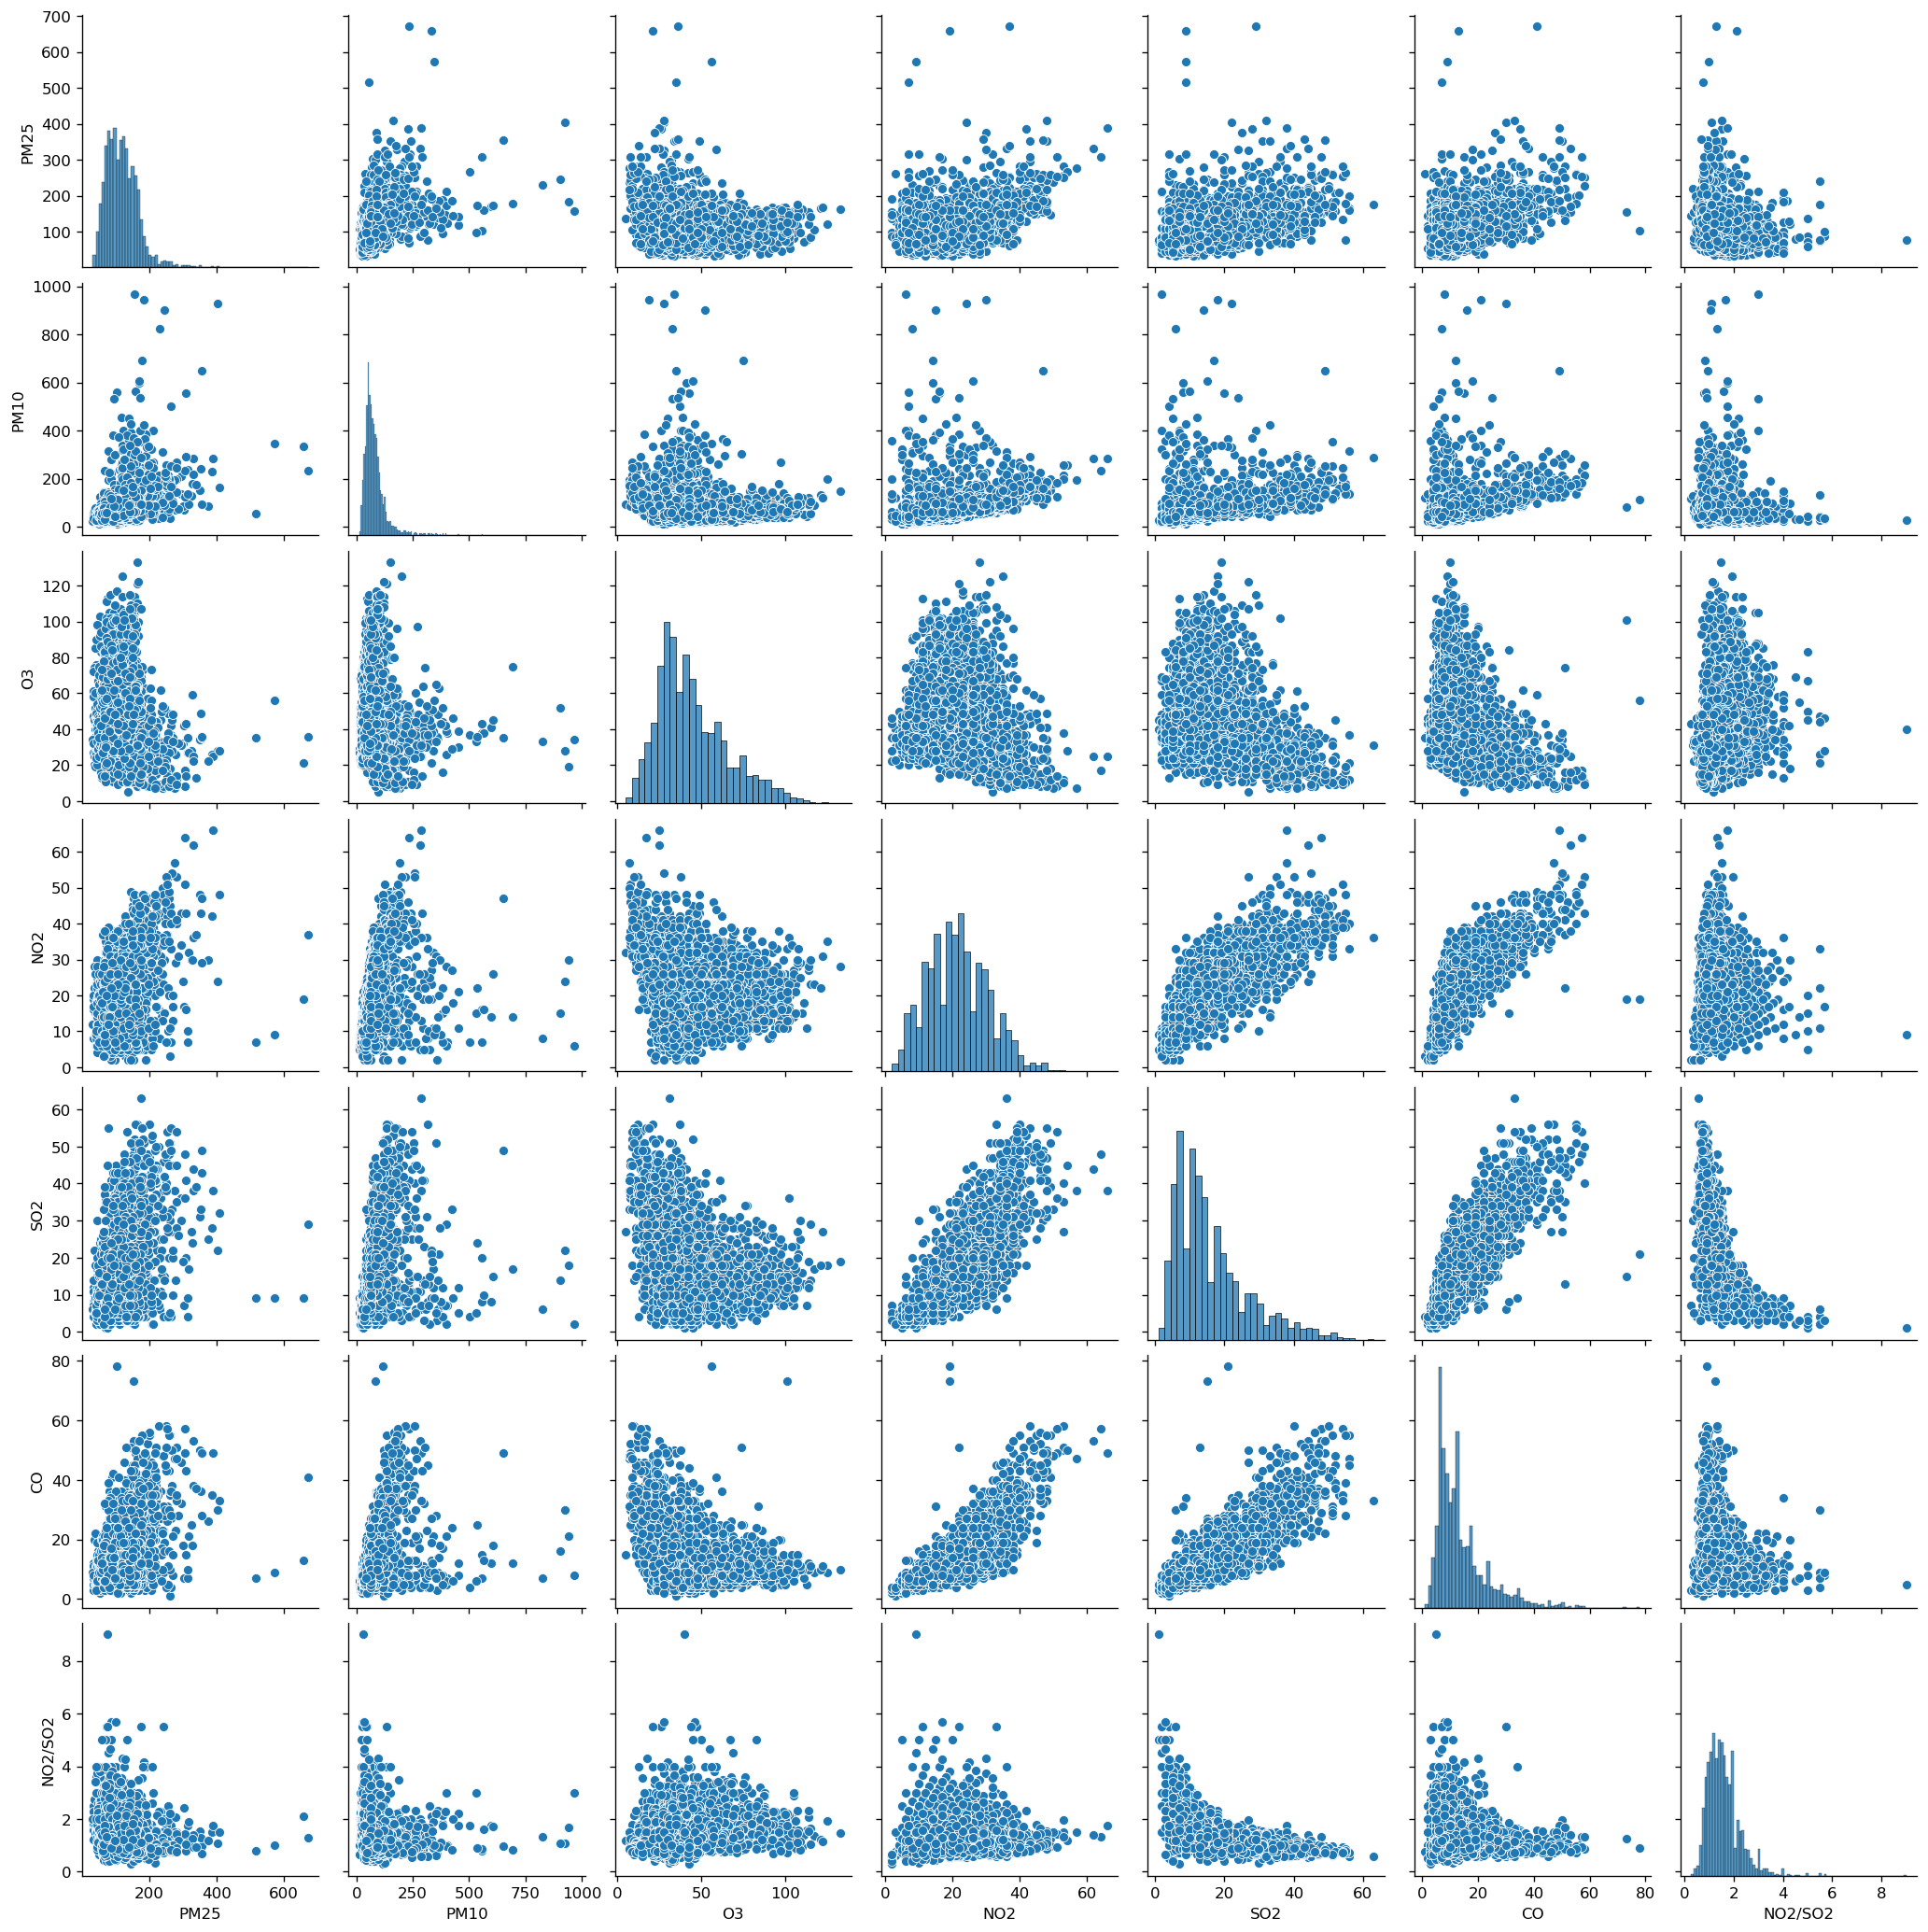

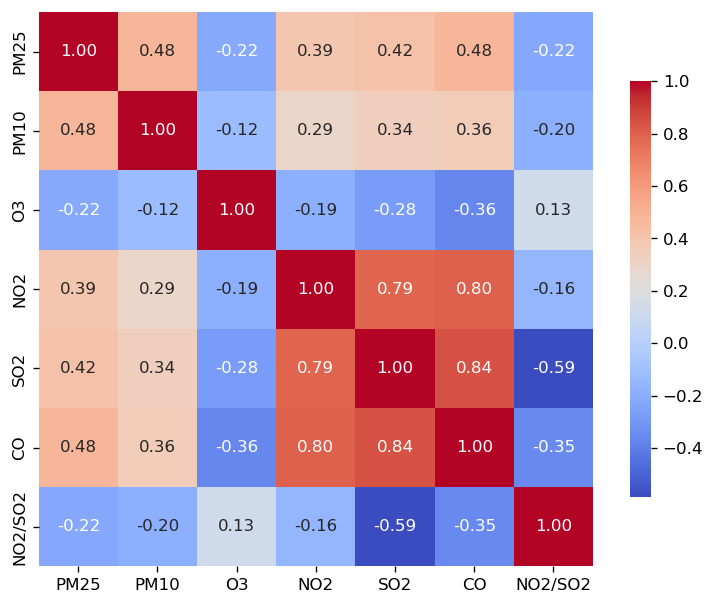

In [7]:
air_pairplot(btu_df)
air_cormatrix(btu_df)

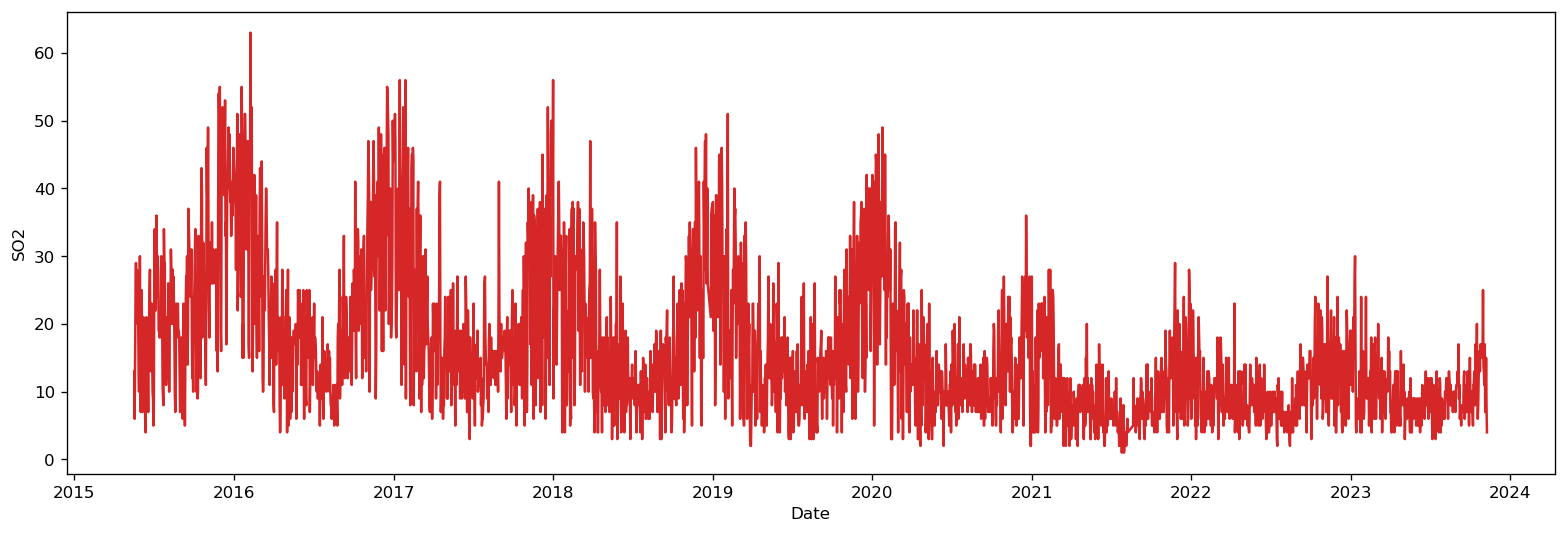

In [8]:
plot_df(btu_df, btu_df.date, btu_df.SO2, xlabel ='Date', ylabel ='SO2')

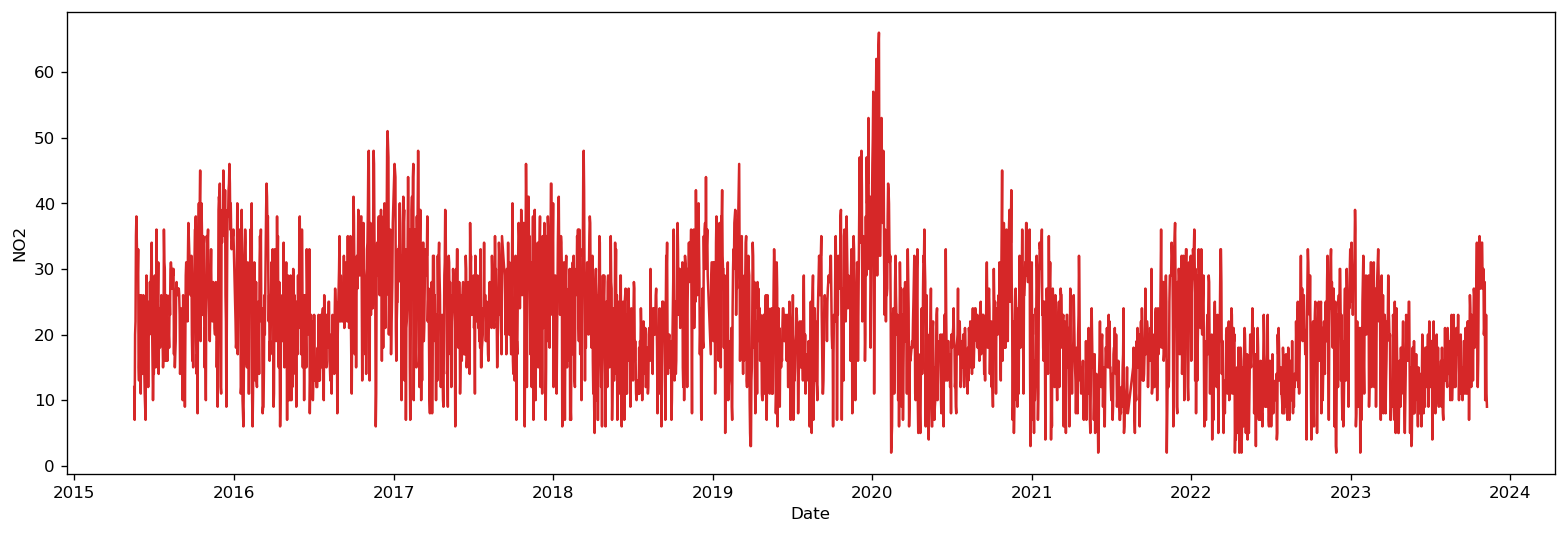

In [9]:
plot_df(btu_df, btu_df.date, btu_df.NO2, xlabel ='Date', ylabel ='NO2')

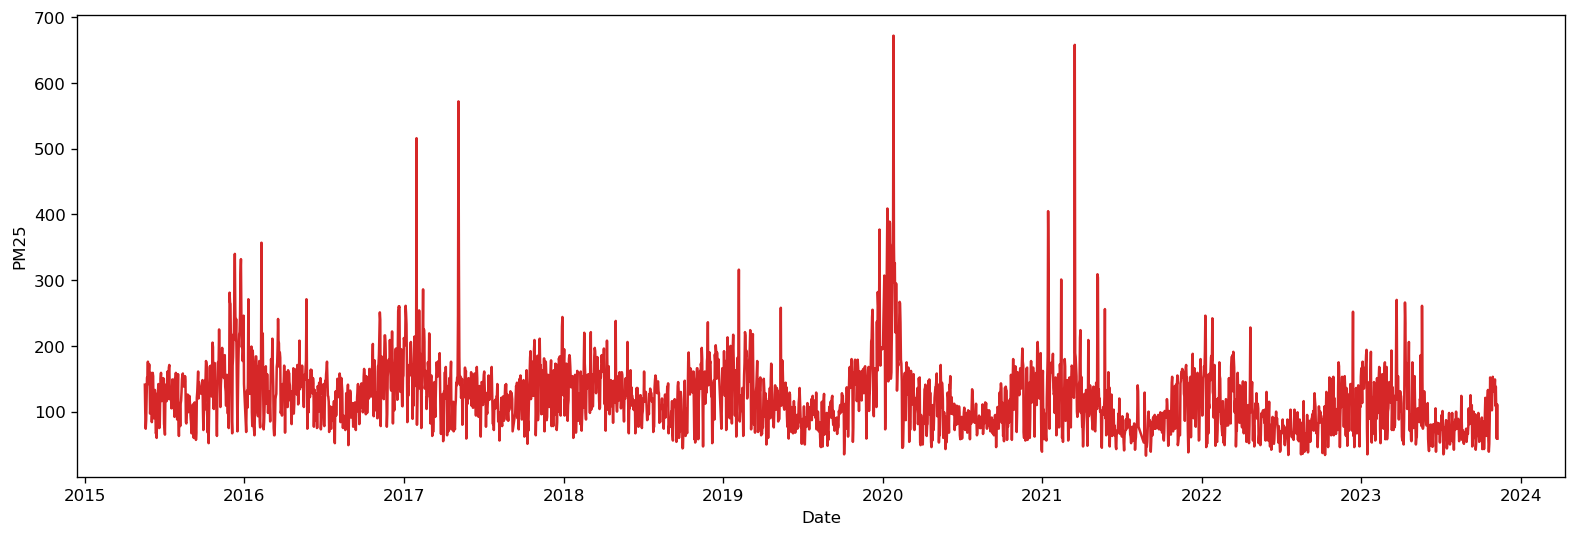

In [10]:
plot_df(btu_df, btu_df.date, btu_df.PM25, xlabel ='Date', ylabel ='PM25')

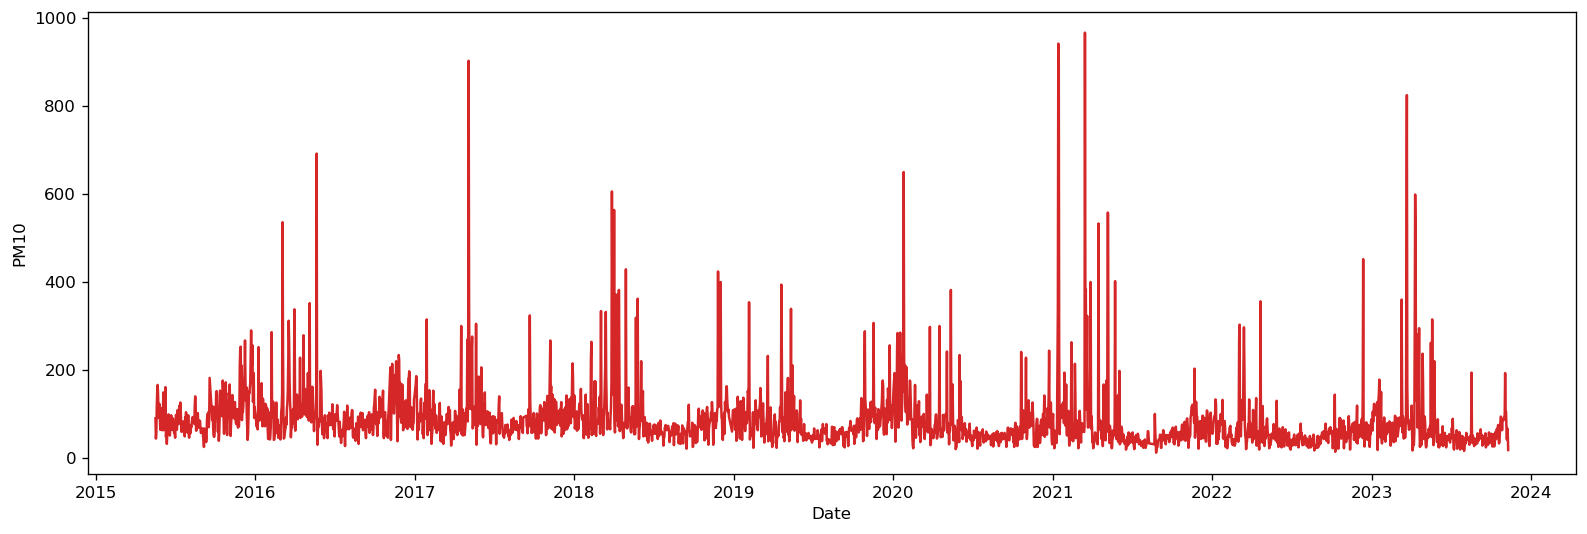

In [11]:
plot_df(btu_df, btu_df.date, btu_df.PM10, xlabel ='Date', ylabel ='PM10')

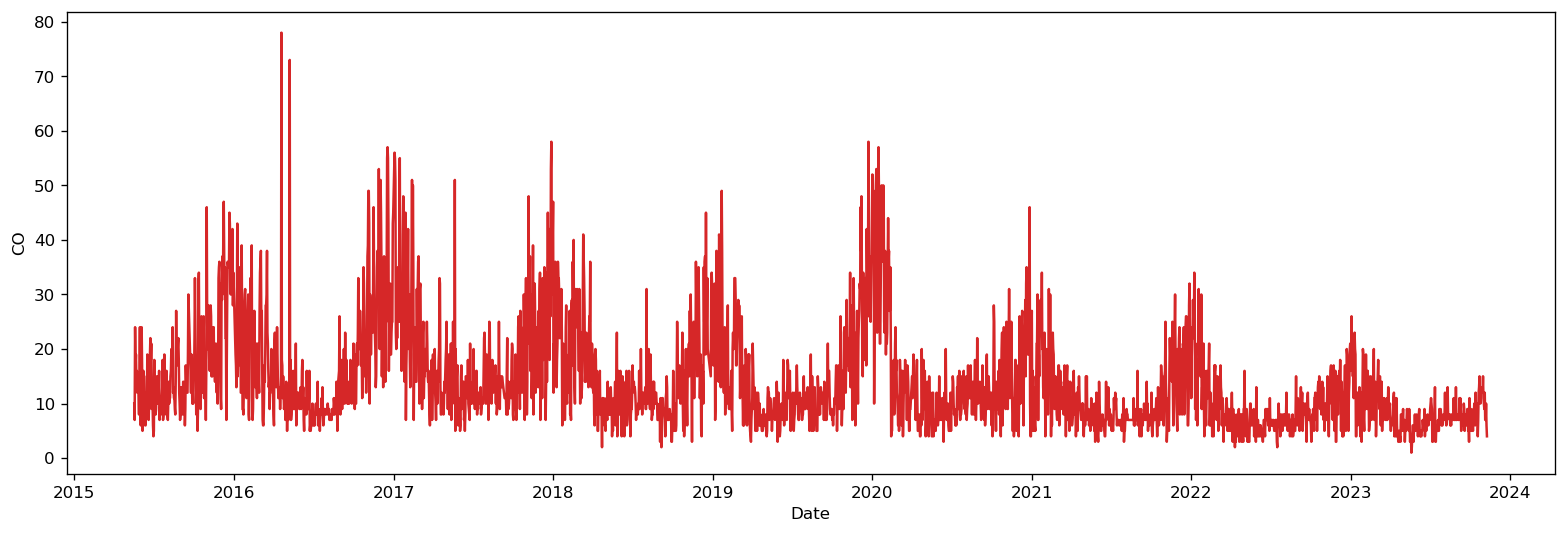

In [12]:
plot_df(btu_df, btu_df.date, btu_df.CO, xlabel ='Date', ylabel ='CO')

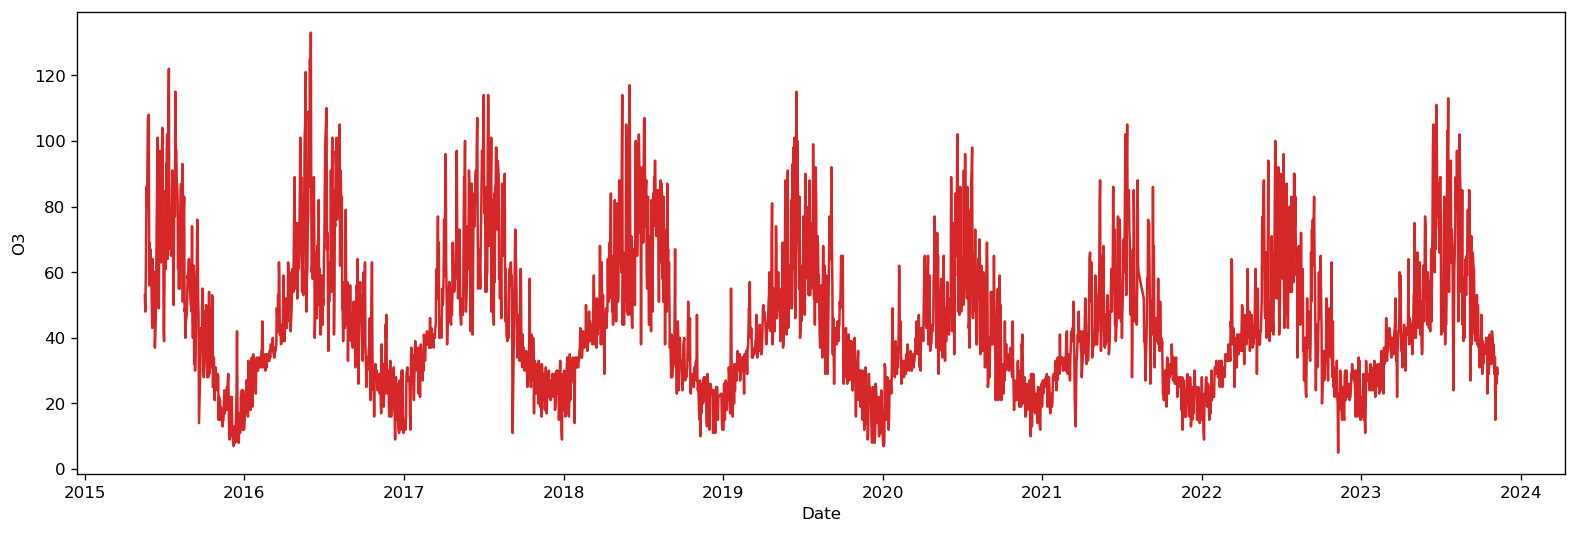

In [13]:
plot_df(btu_df, btu_df.date, btu_df.O3, xlabel ='Date', ylabel ='O3')

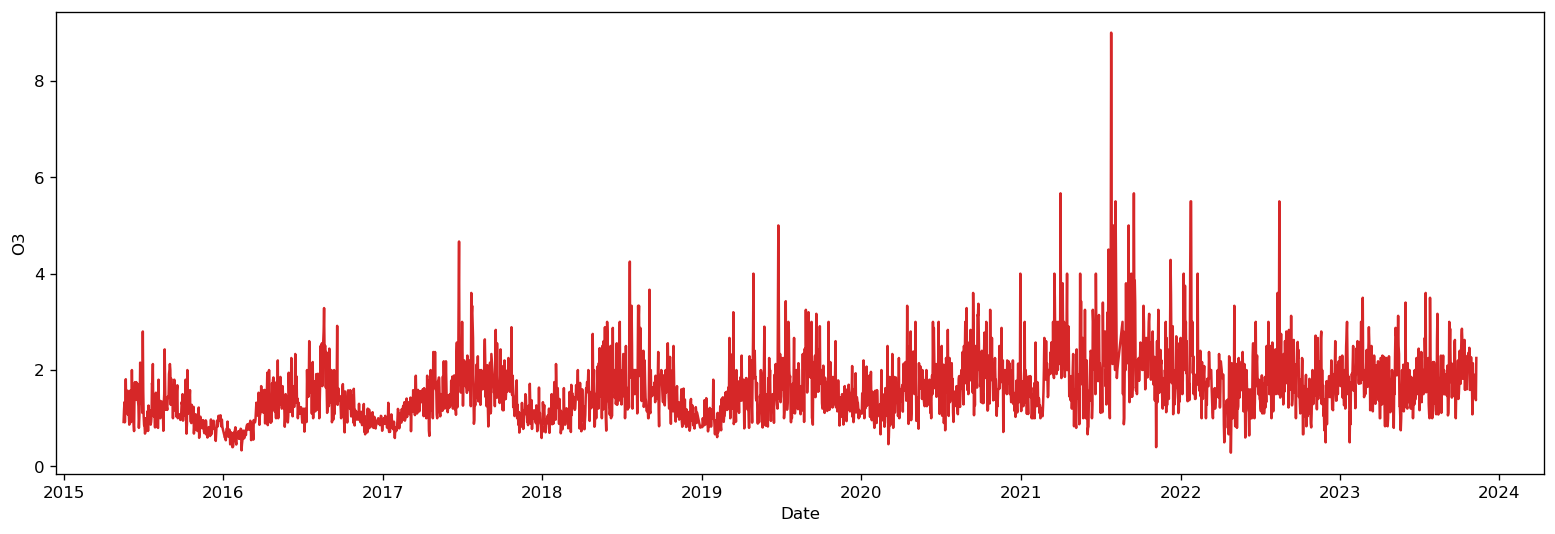

In [14]:
plot_df(btu_df, btu_df.date, btu_df.NO2/btu_df.SO2, xlabel ='Date', ylabel ='O3')

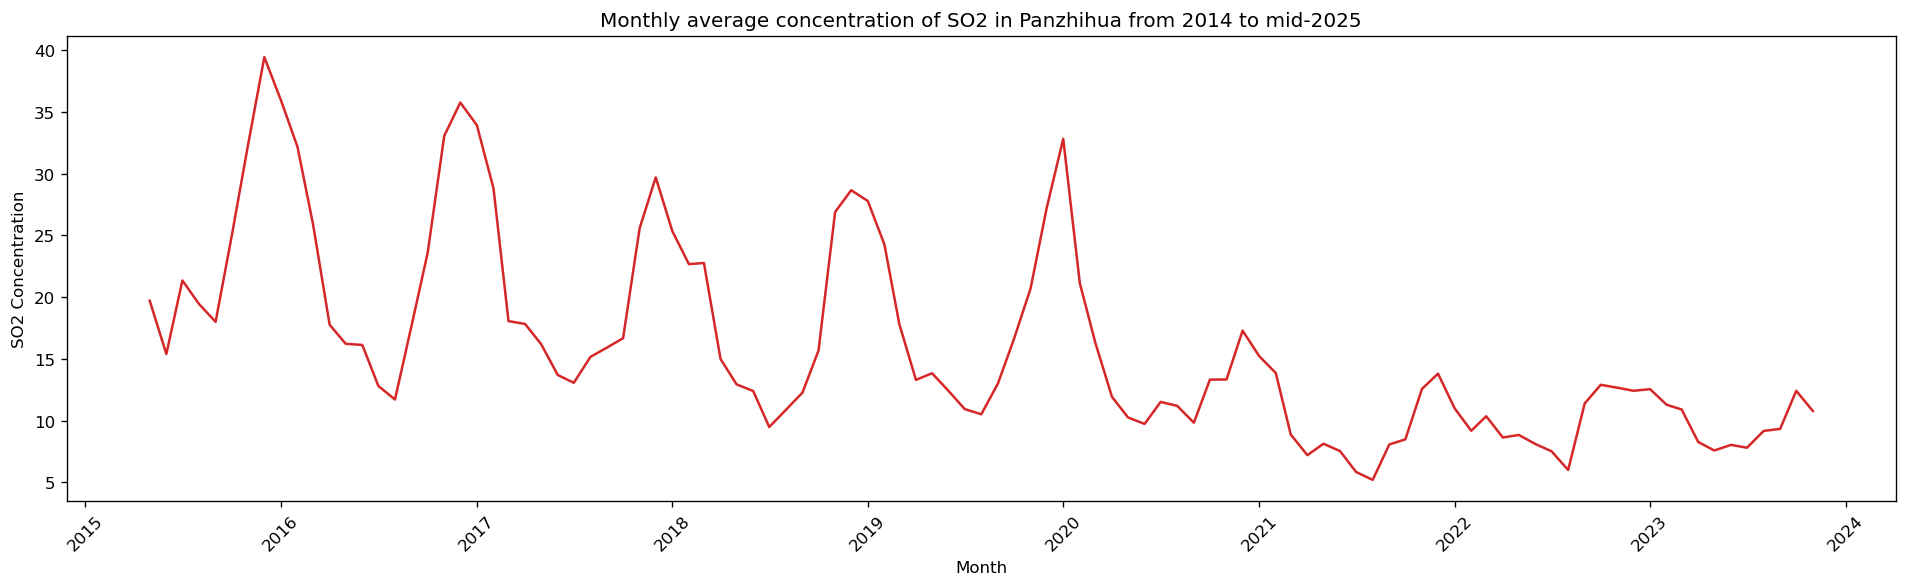

In [15]:
monthlyAverage(btu_df, 'Panzhihua','SO2')

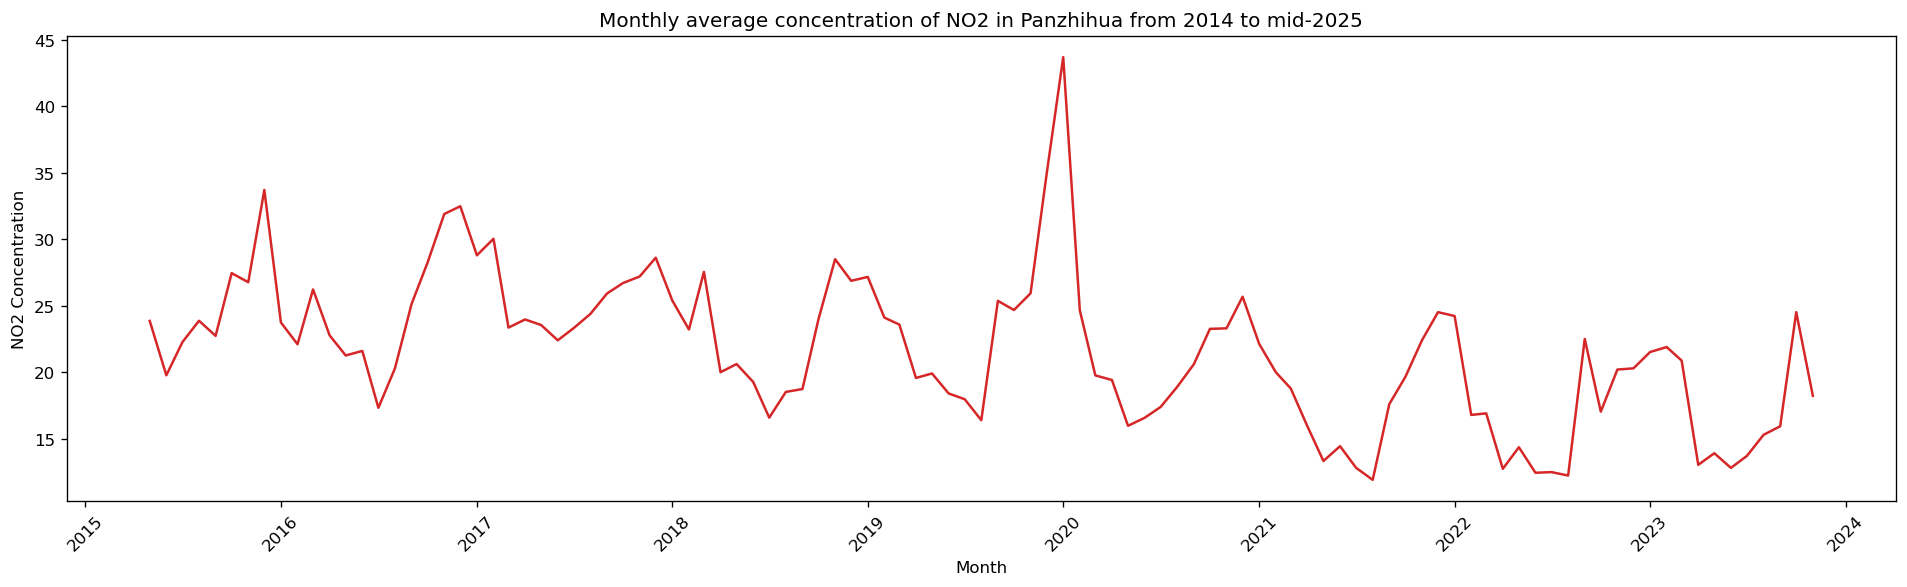

In [16]:
monthlyAverage(btu_df, 'Panzhihua','NO2')

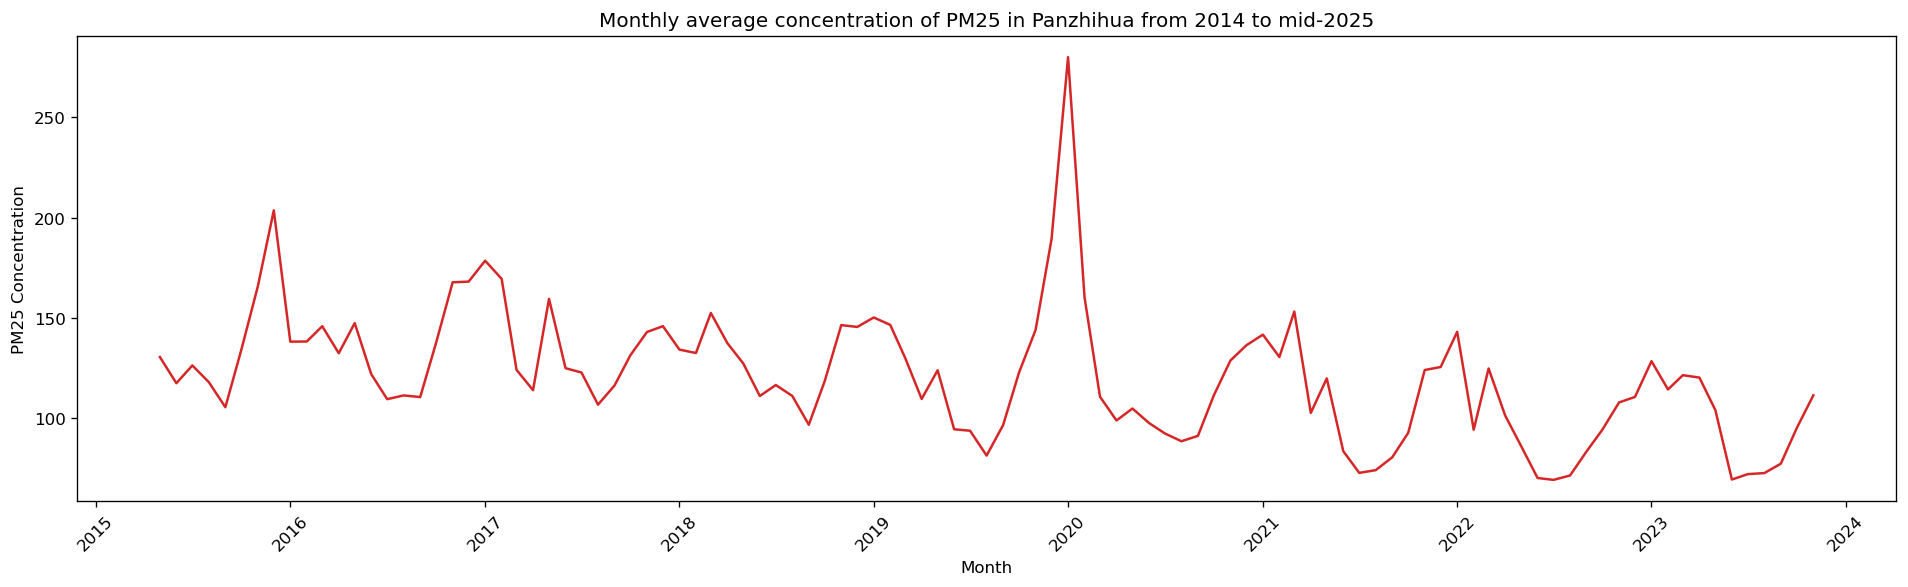

In [17]:
monthlyAverage(btu_df, 'Panzhihua','PM25')

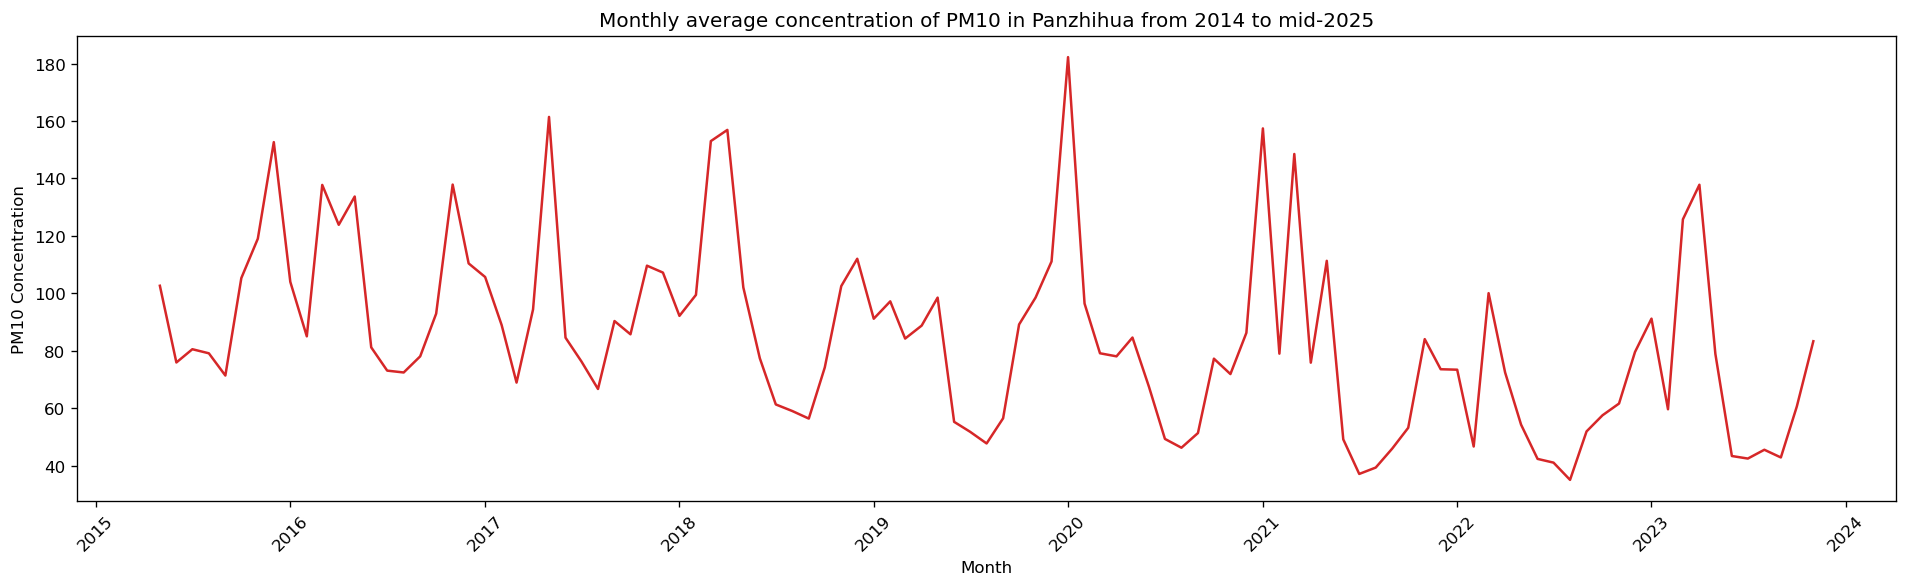

In [18]:
monthlyAverage(btu_df, 'Panzhihua','PM10')

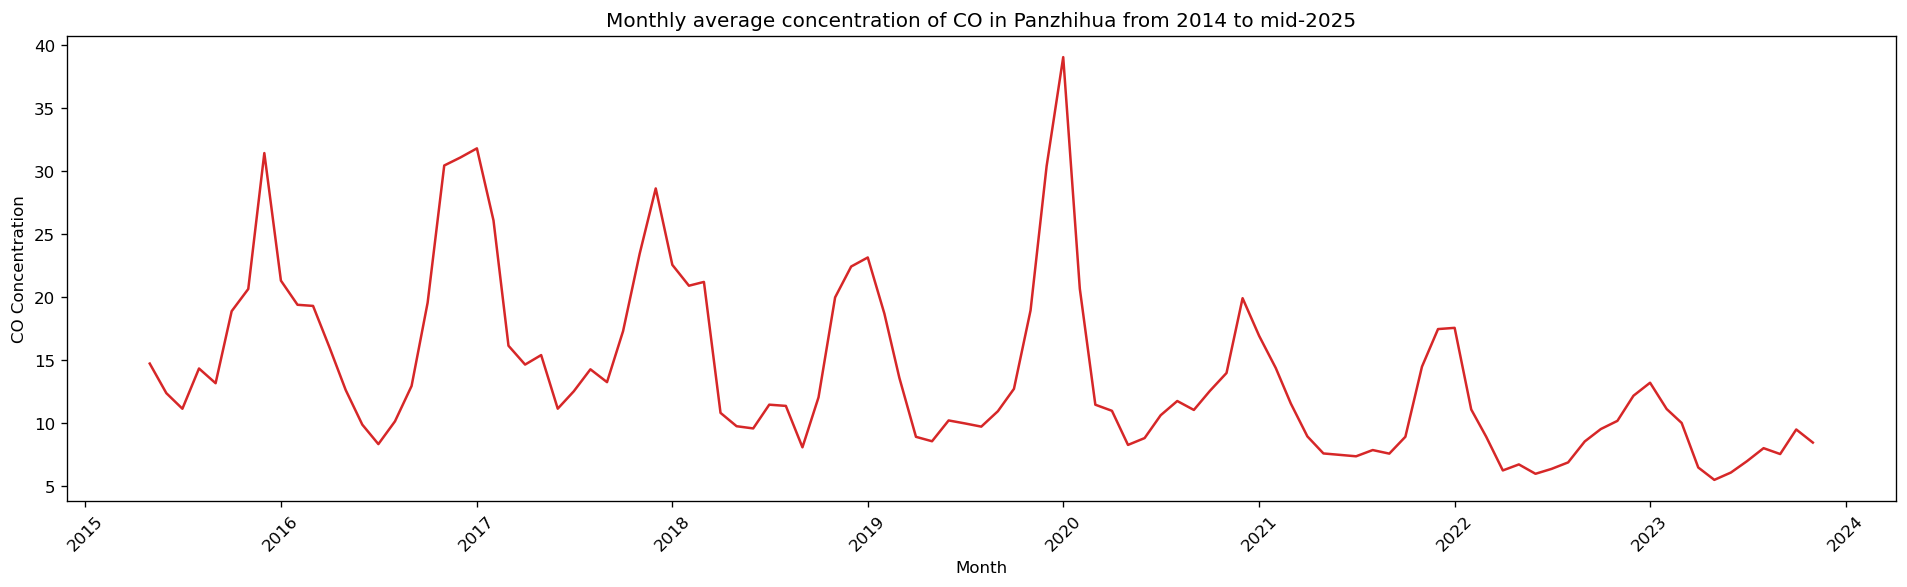

In [19]:
monthlyAverage(btu_df, 'Panzhihua','CO')

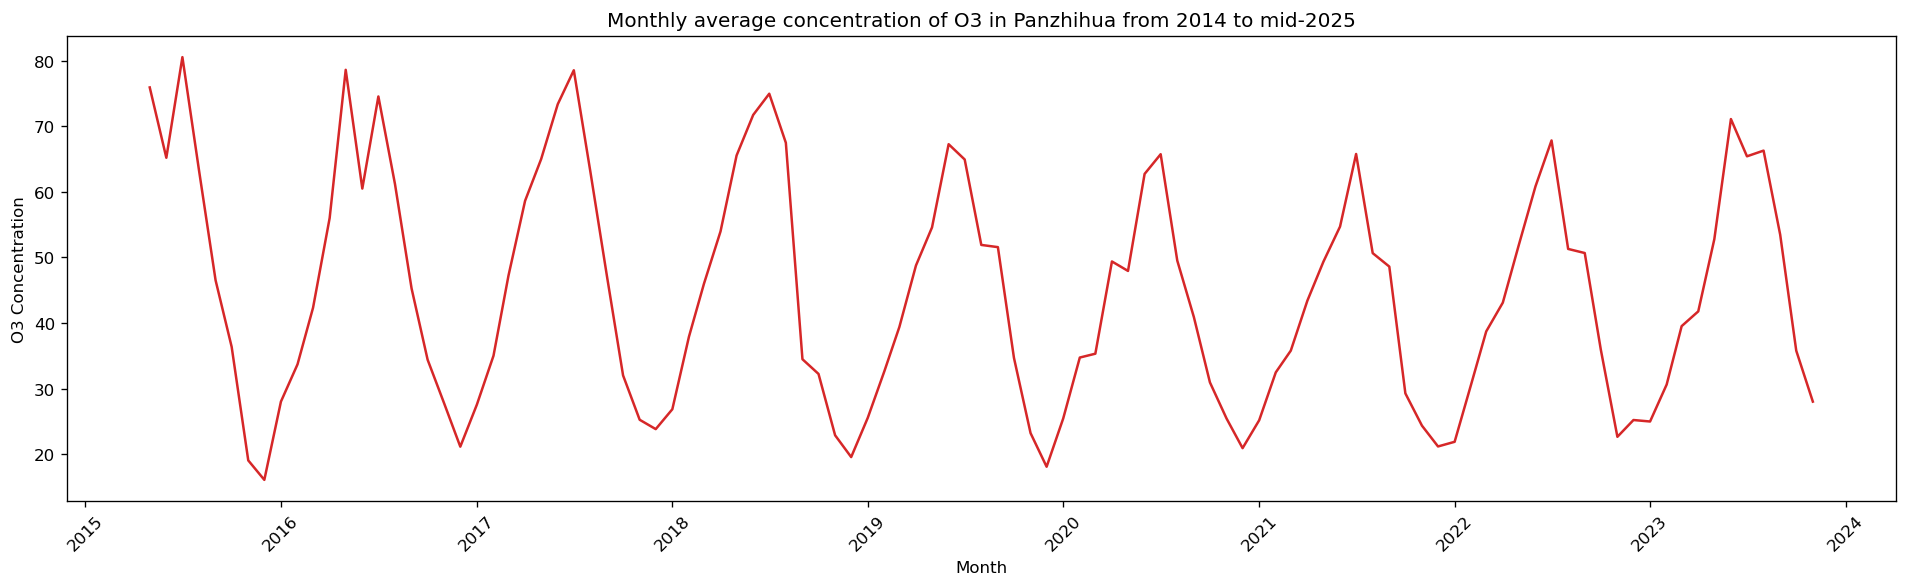

In [20]:
monthlyAverage(btu_df, 'Panzhihua','O3')

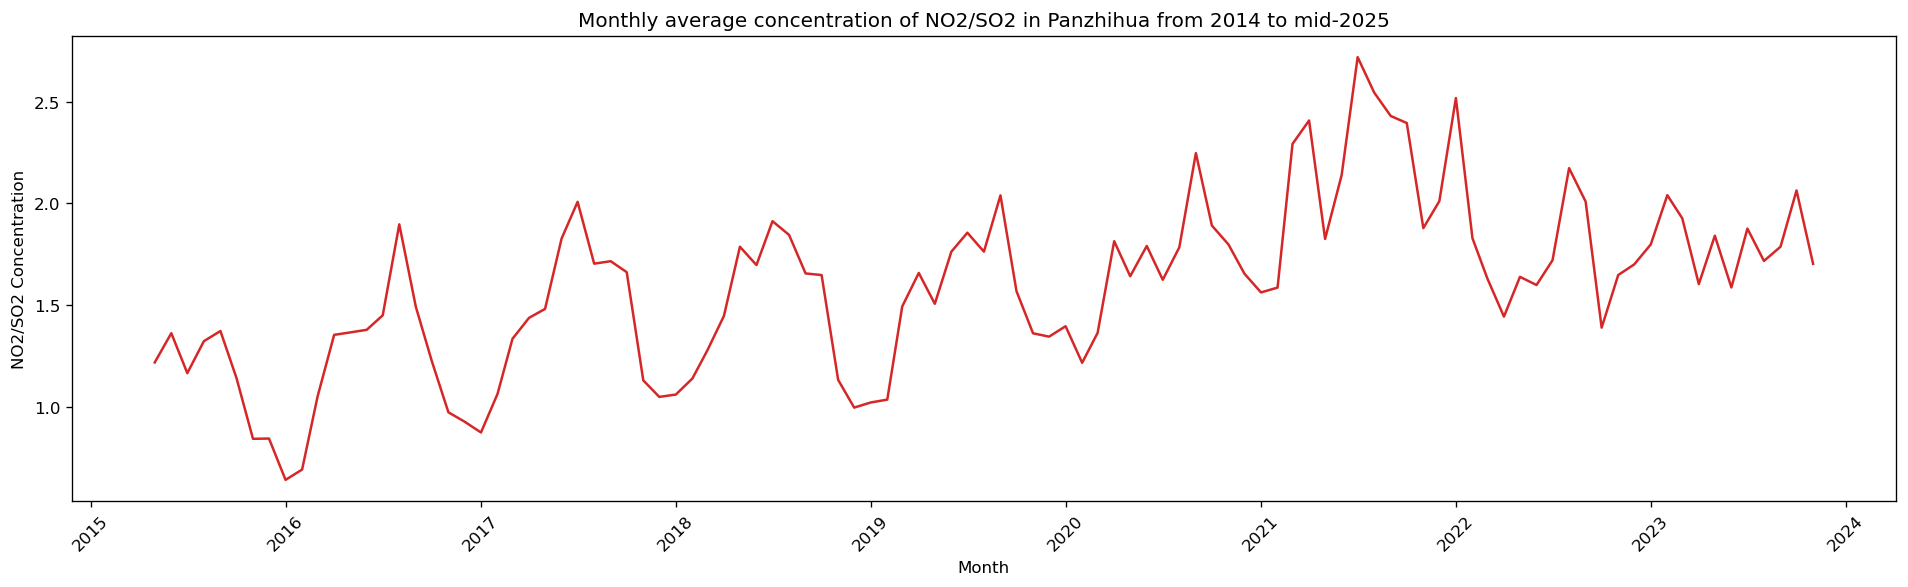

In [21]:
monthlyAverage(btu_df, 'Panzhihua','NO2/SO2')

# Considering the change of pollutants.

Let $P_t$ denote the value of air pollutant $P$ on day $t$, and $P_{t-1}$ the value on onday prior. To quantify day-to-day changes and capture the seasonal patterns, we consider the following expression:
$$
\log \frac{P_t}{P_{t-1}}
$$
This quantity allows us to measure how pollutant levels fluctuate over time and analyze the distribution of these changes.

Furthermore, to capture broader trends, we compute the cumulative sum of these daily changes.

In [22]:
df_ratio(btu_df)
btu_df_ratio = df_ratio(btu_df).drop(columns=['NO2/SO2'])
btu_df_ratio

date  PM25_ratio  PM10_ratio  O3_ratio  NO2_ratio  SO2_ratio  \
591  2023-11-08    0.631993    1.098612  0.066691   0.200671   0.693147   
590  2023-11-07   -0.631993    0.215709 -0.175891   0.737599   0.628609   
589  2023-11-06    0.497174   -0.467023  0.000000  -0.650588  -0.628609   
588  2023-11-05    0.352543    0.496437  0.037740  -0.182322  -0.133531   
587  2023-11-04   -0.235906    0.429333 -0.587787   1.029619   0.887303   
...         ...         ...         ...       ...        ...        ...   
3676 2015-05-22   -0.211696   -0.101352  0.072321  -0.082238   0.322773   
3675 2015-05-21   -0.346276   -0.239951 -0.191667  -0.464306  -0.189242   
3674 2015-05-20   -0.161843   -0.710242 -0.219629  -0.095310  -0.470004   
3673 2015-05-19    0.280902   -0.276253 -0.171850  -1.049822  -0.916291   
3672 2015-05-18    0.363792    0.715620  0.099091   0.538997   0.773190   

      CO_ratio  
591   0.405465  
590   0.510826  
589  -0.356675  
588   0.000000  
587   0.538997  
...        ...  
3676  0.305382  
3675 -0.111226  
3674  0.344840  
3673 -1.232144  
3672  0.356675  

[3057 rows x 7 columns]

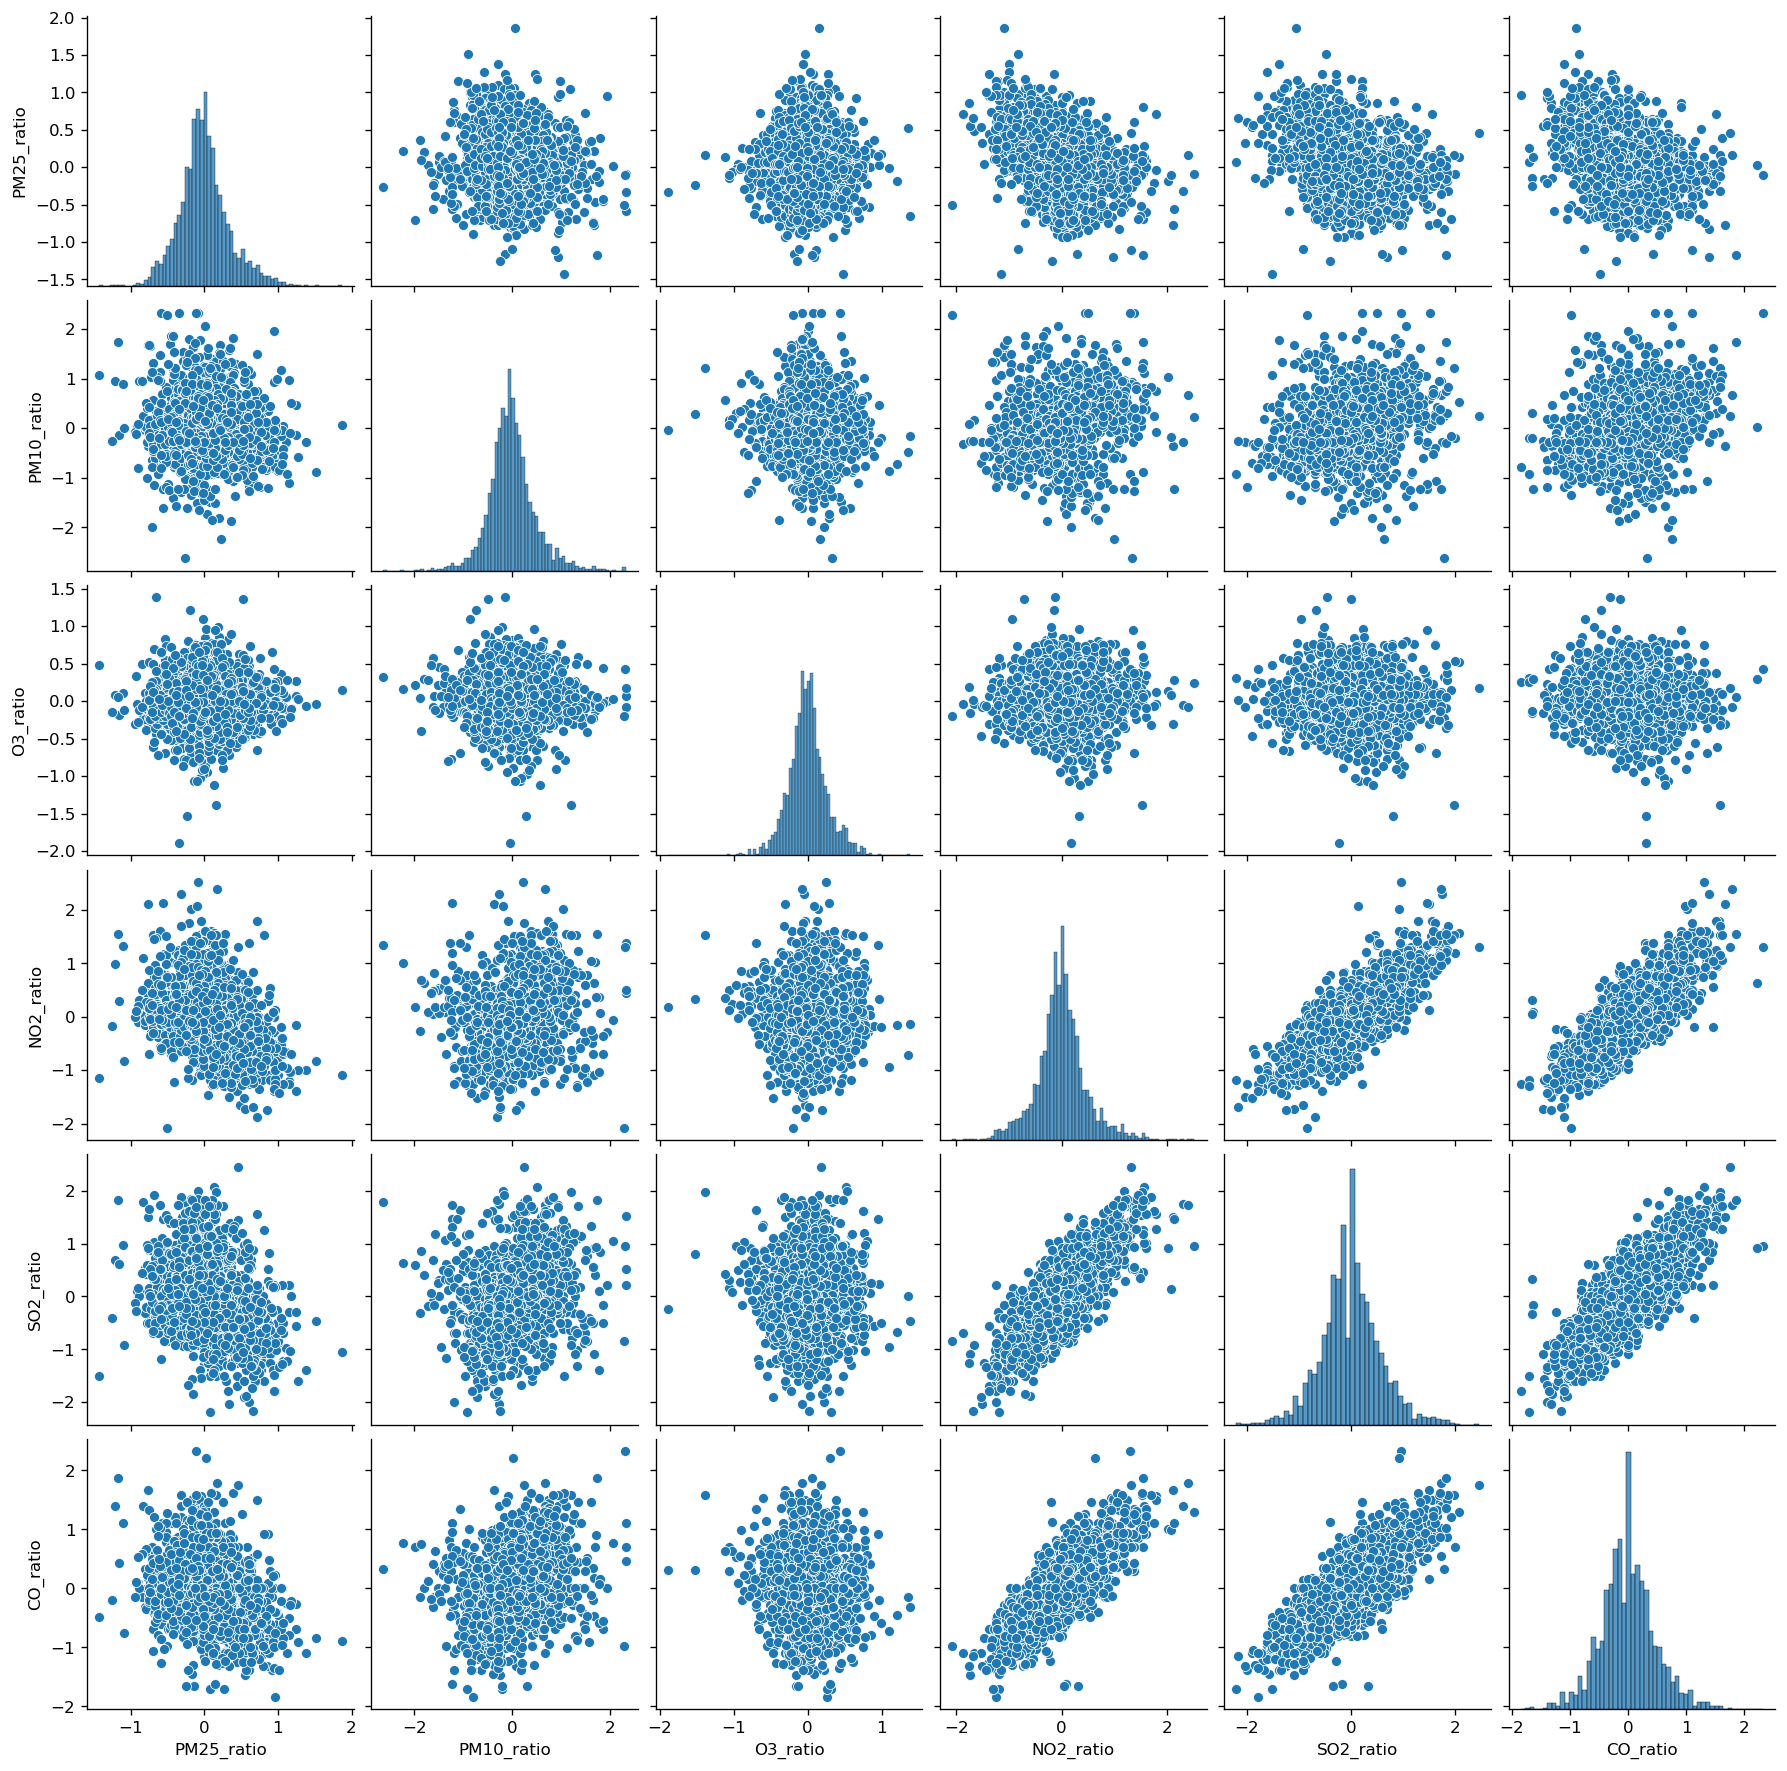

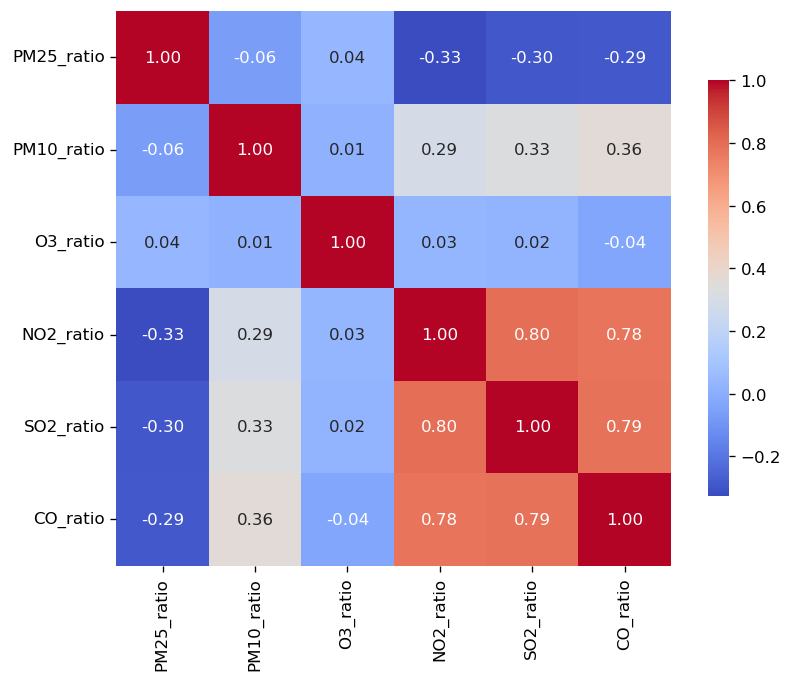

In [23]:
air_pairplot (btu_df_ratio)
air_cormatrix(btu_df_ratio)

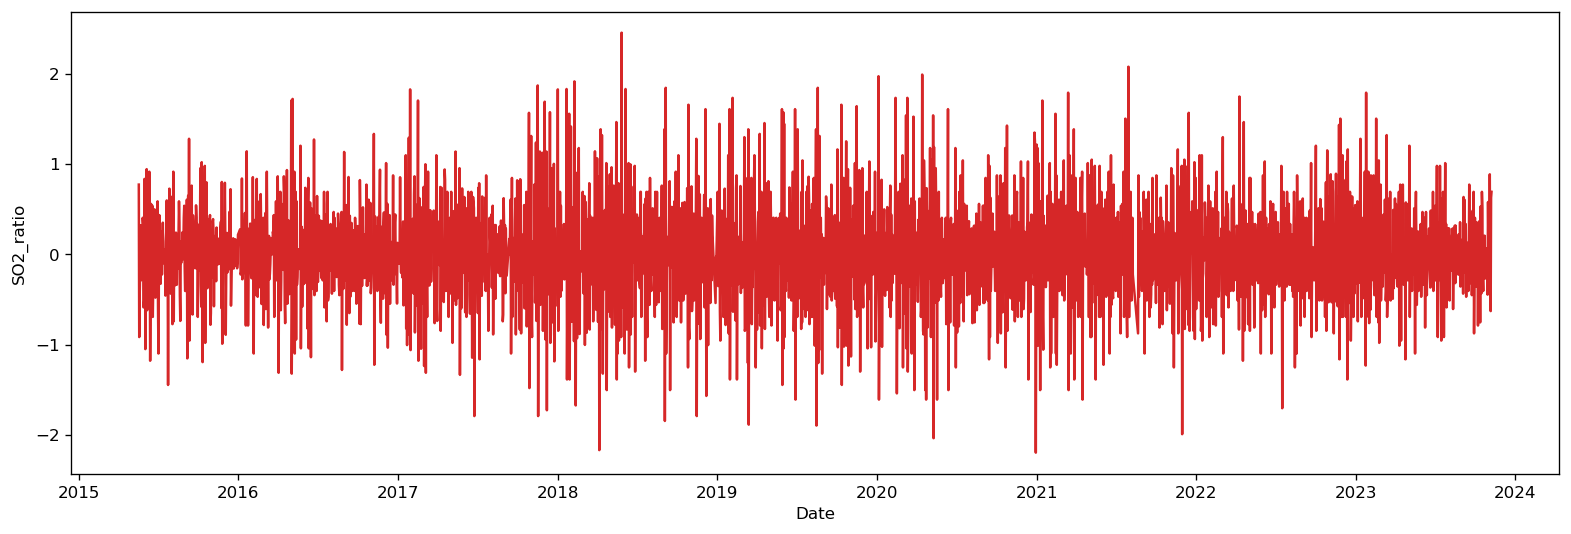

In [24]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

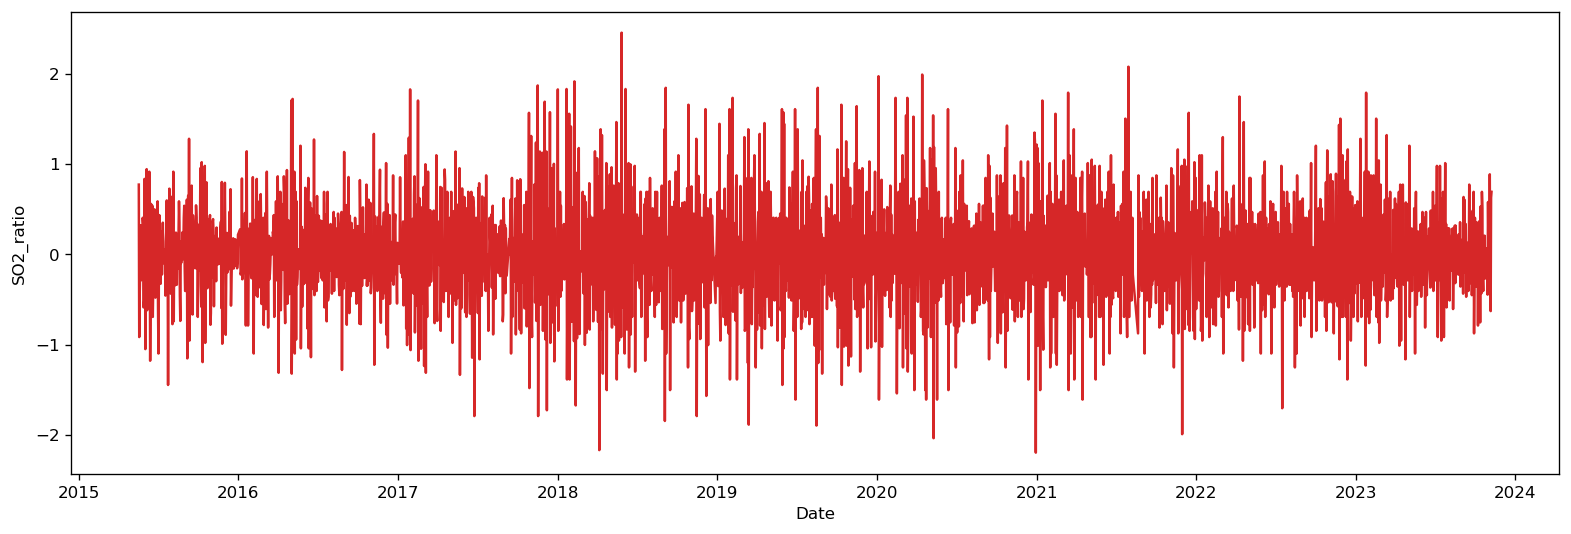

In [25]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

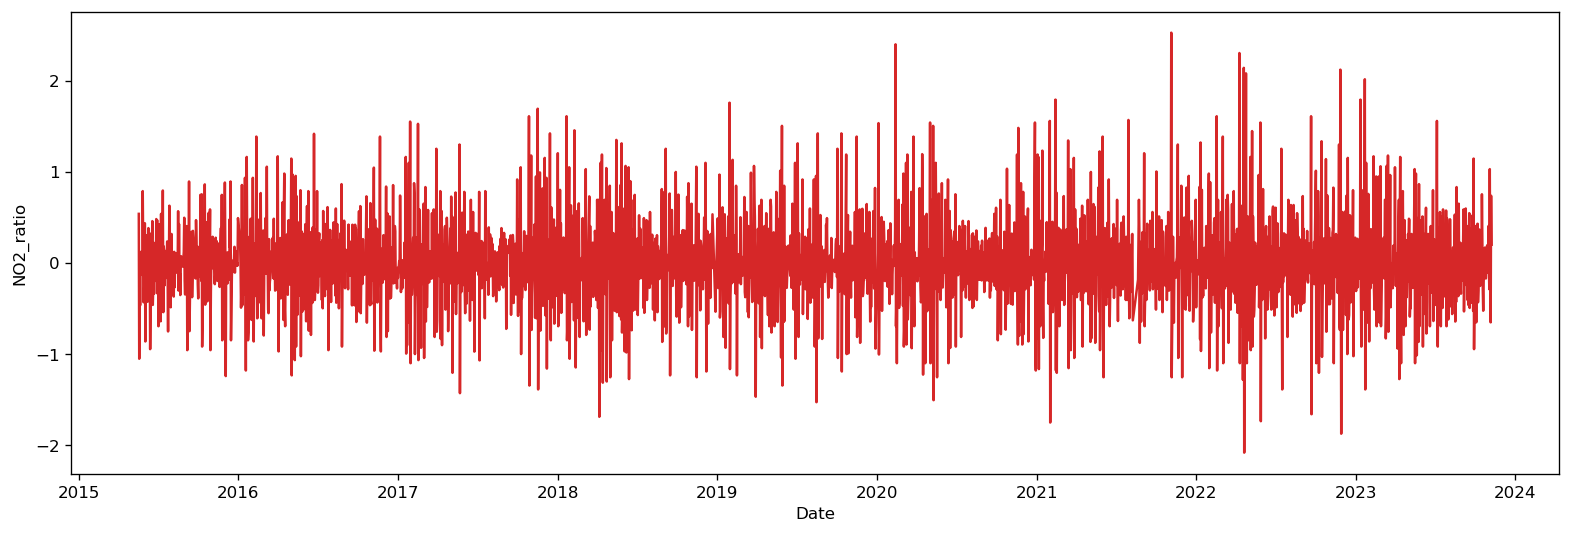

In [26]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.NO2_ratio, xlabel ='Date', ylabel ='NO2_ratio')

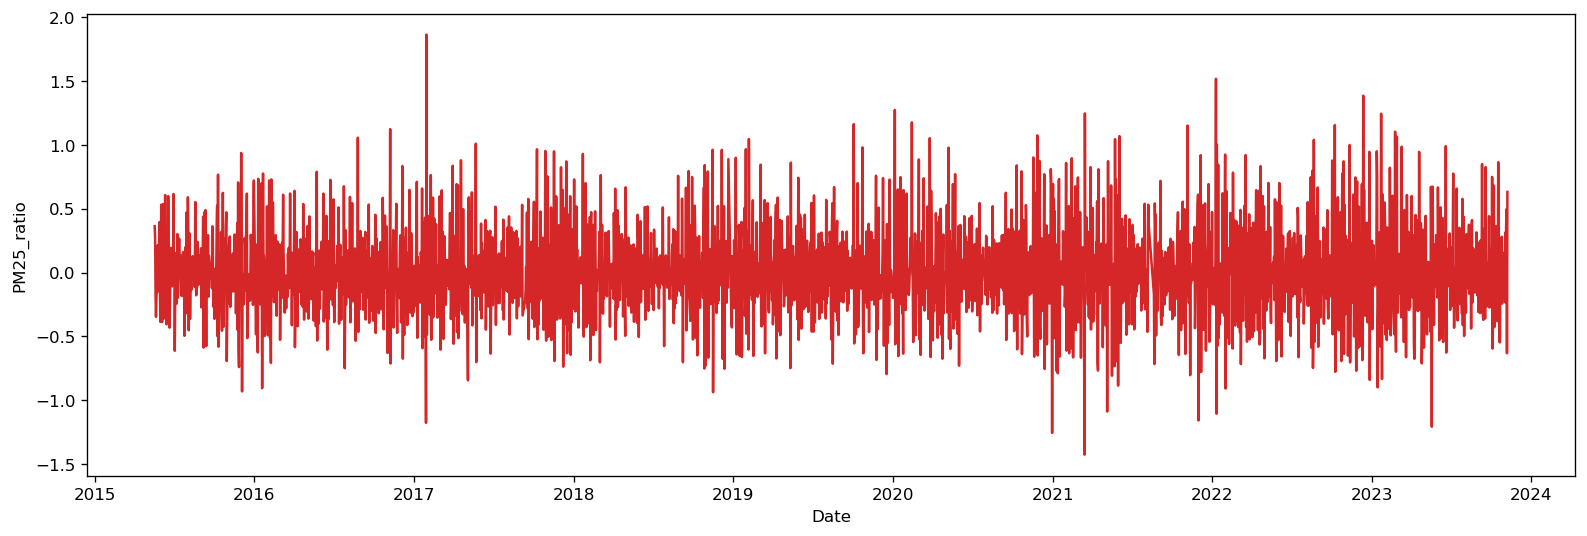

In [27]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.PM25_ratio, xlabel ='Date', ylabel ='PM25_ratio')

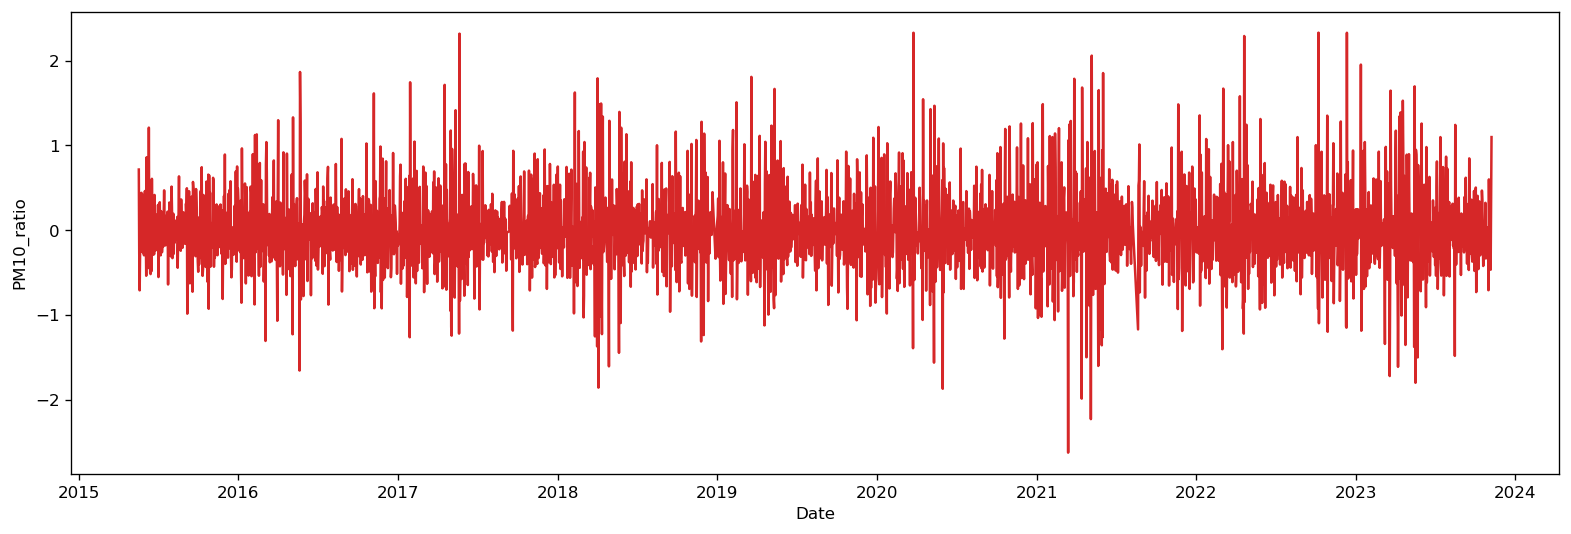

In [28]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.PM10_ratio, xlabel ='Date', ylabel ='PM10_ratio')

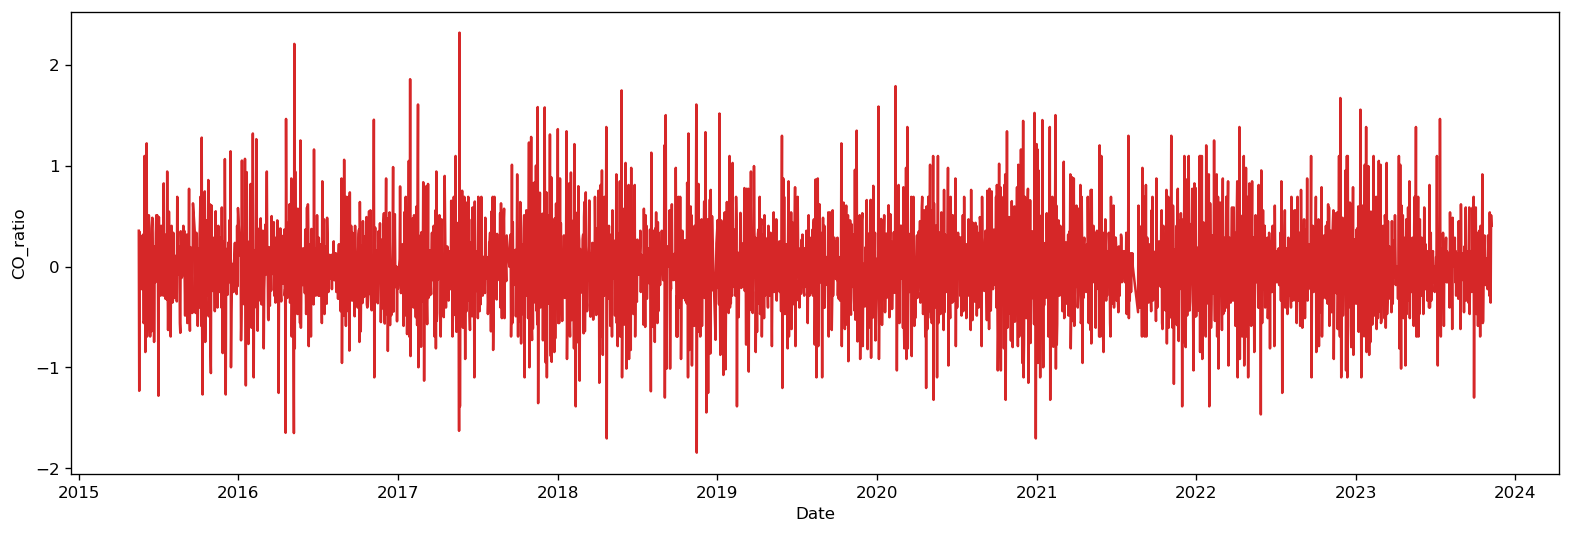

In [29]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.CO_ratio, xlabel ='Date', ylabel ='CO_ratio')

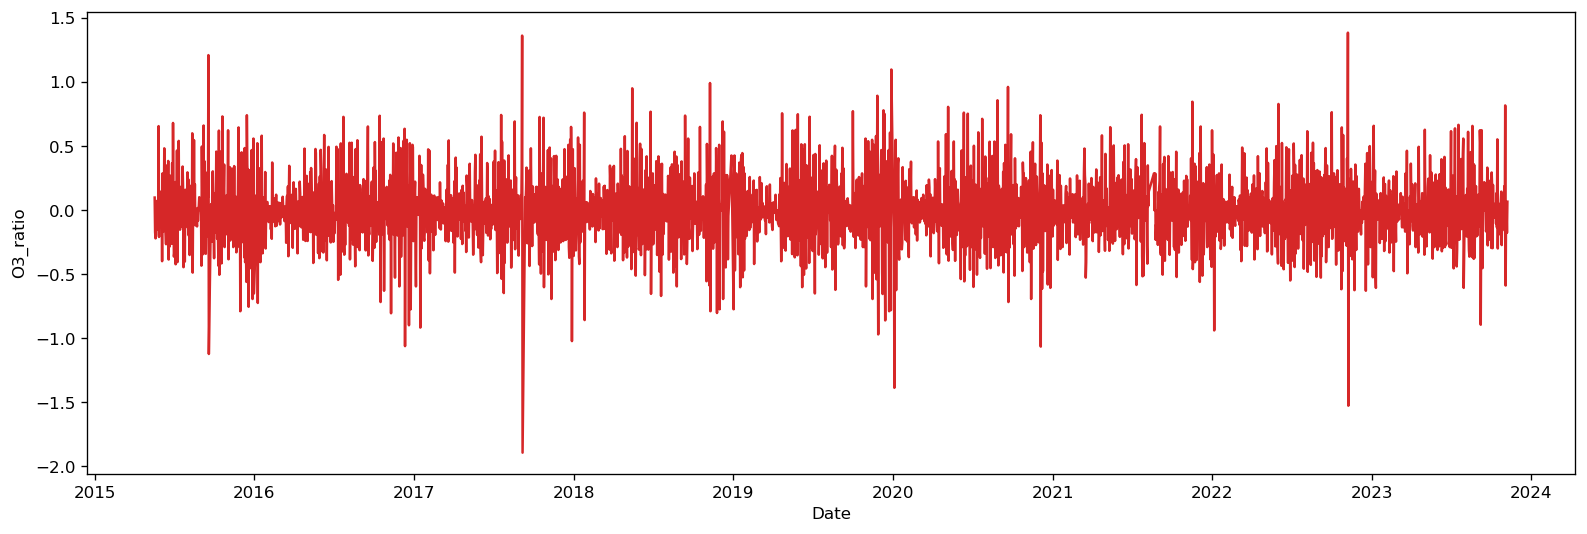

In [30]:
plot_df(btu_df_ratio, btu_df_ratio.date, btu_df_ratio.O3_ratio, xlabel ='Date', ylabel ='O3_ratio')

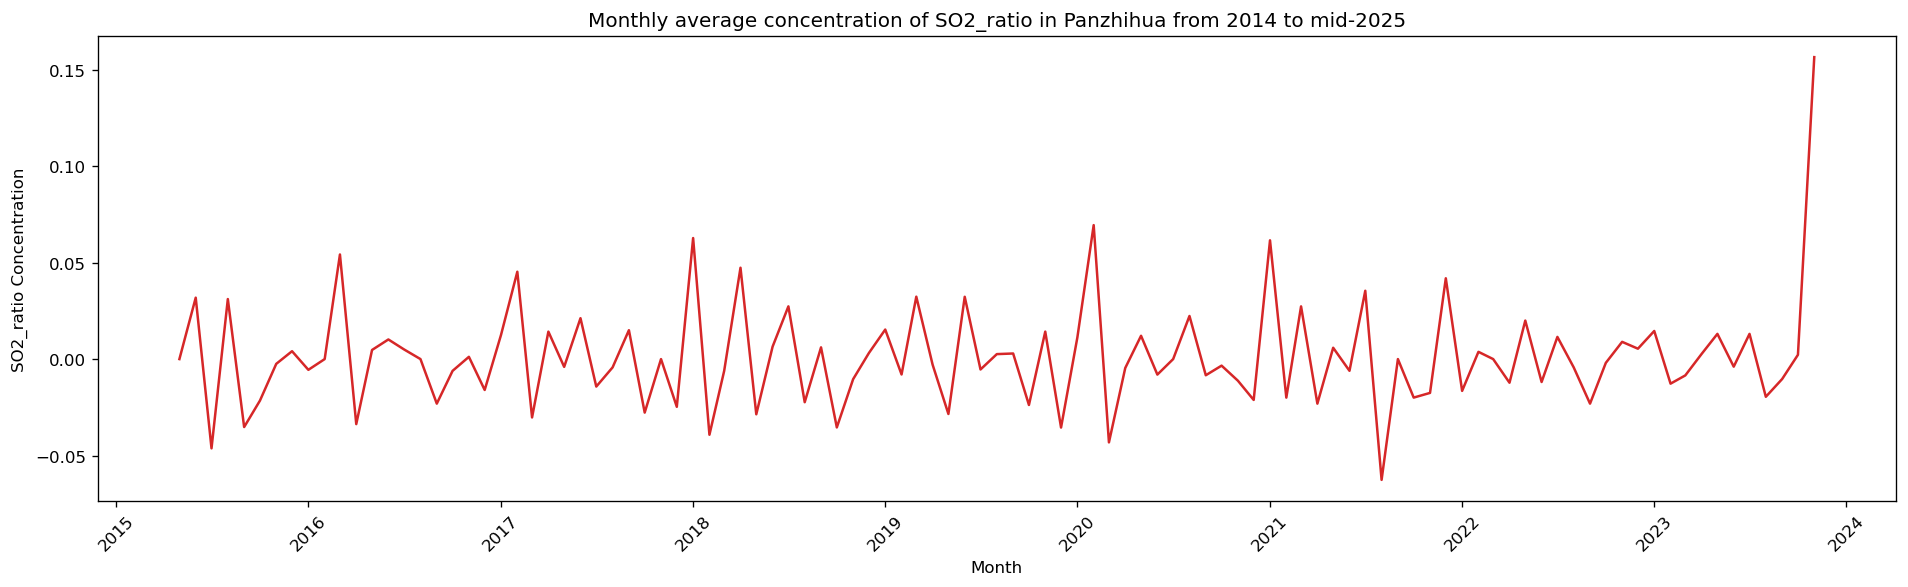

In [31]:
monthlyAverage(btu_df_ratio, 'Panzhihua','SO2_ratio')

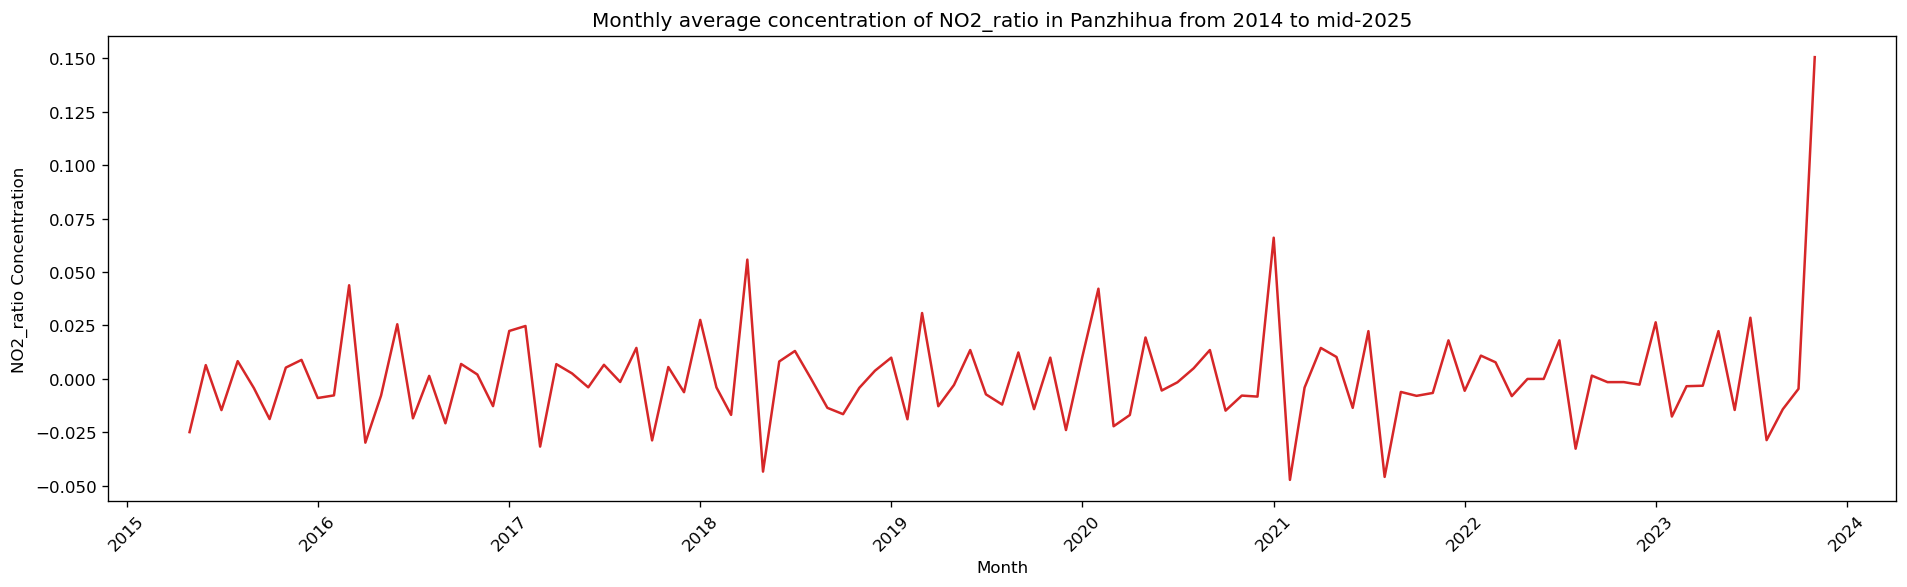

In [32]:
monthlyAverage(btu_df_ratio, 'Panzhihua','NO2_ratio')

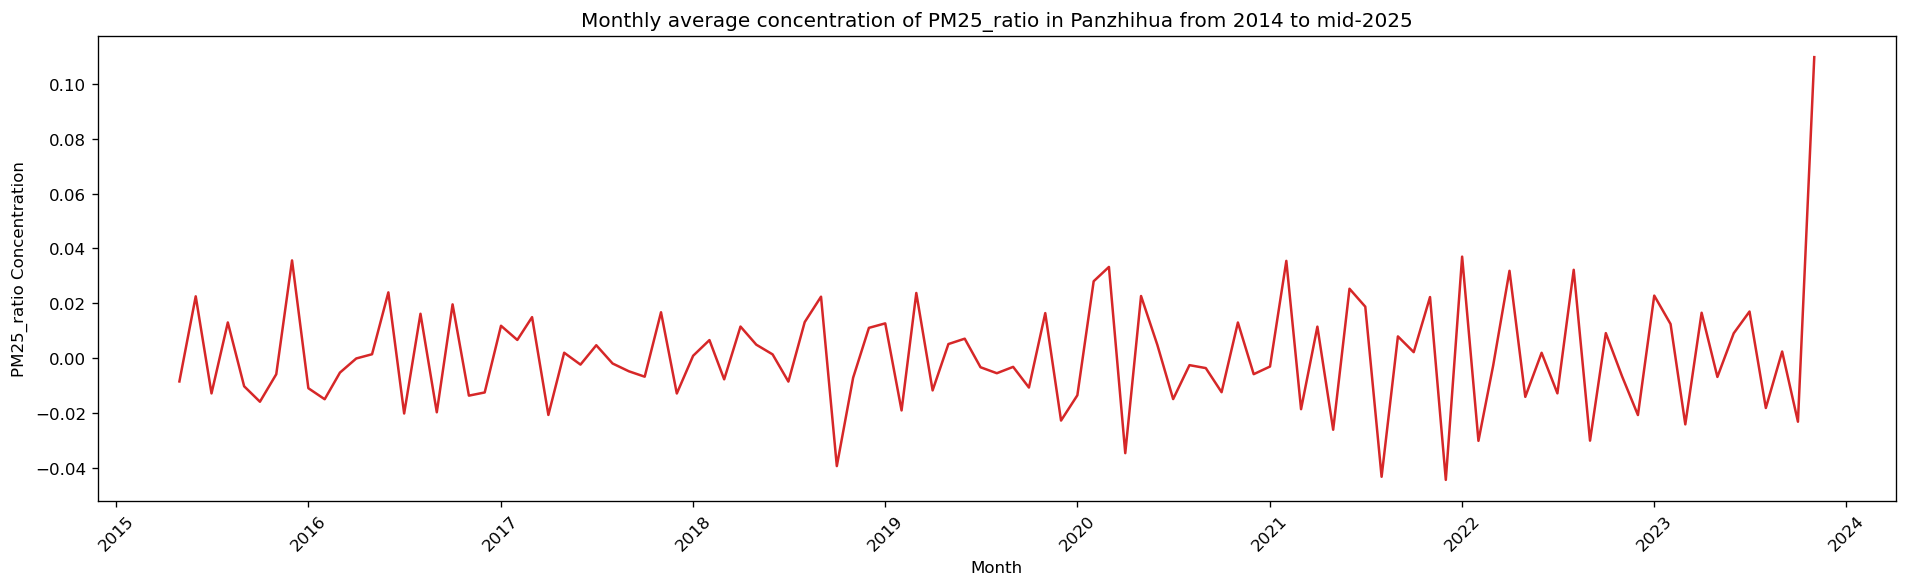

In [33]:
monthlyAverage(btu_df_ratio, 'Panzhihua','PM25_ratio')

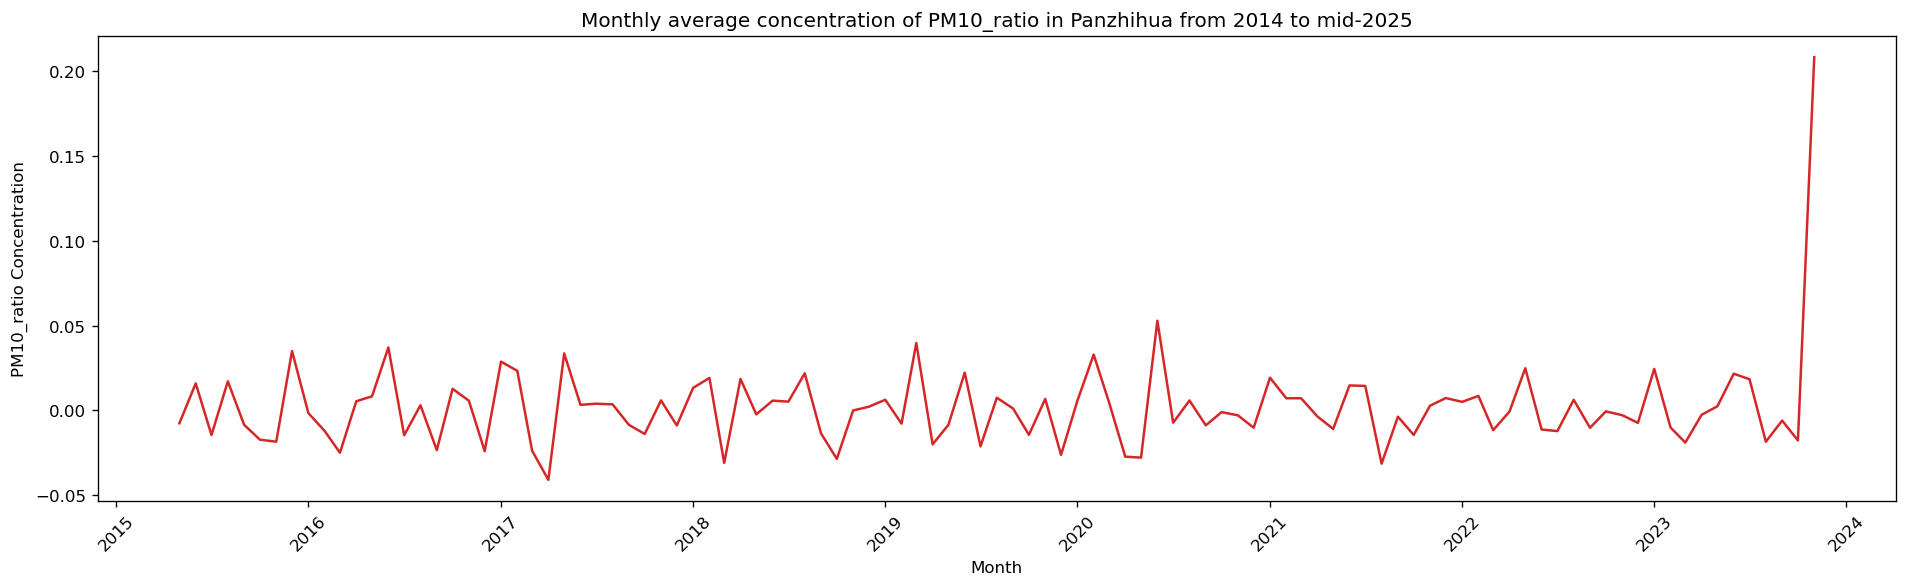

In [34]:
monthlyAverage(btu_df_ratio, 'Panzhihua','PM10_ratio')

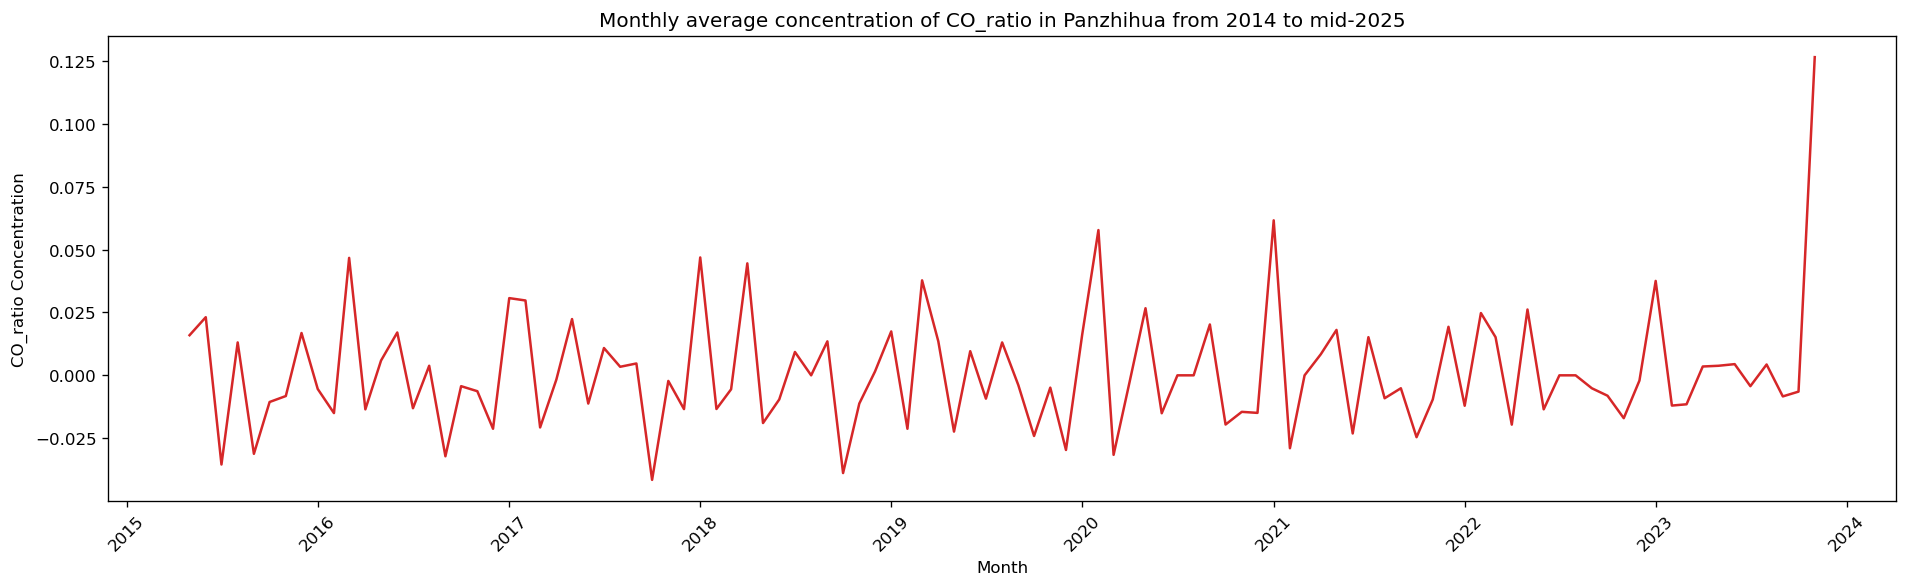

In [35]:
monthlyAverage(btu_df_ratio, 'Panzhihua','CO_ratio')

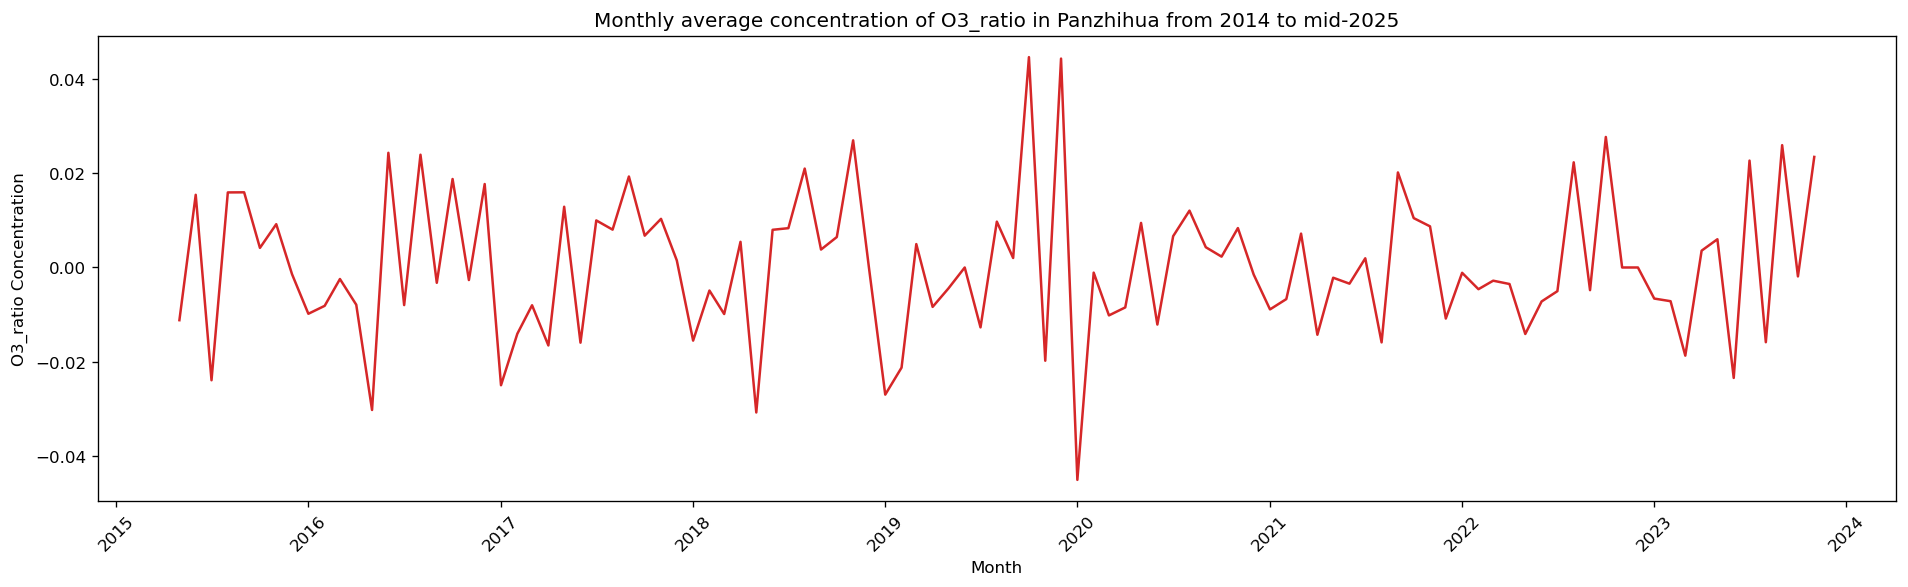

In [36]:
monthlyAverage(btu_df_ratio, 'Panzhihua','O3_ratio')

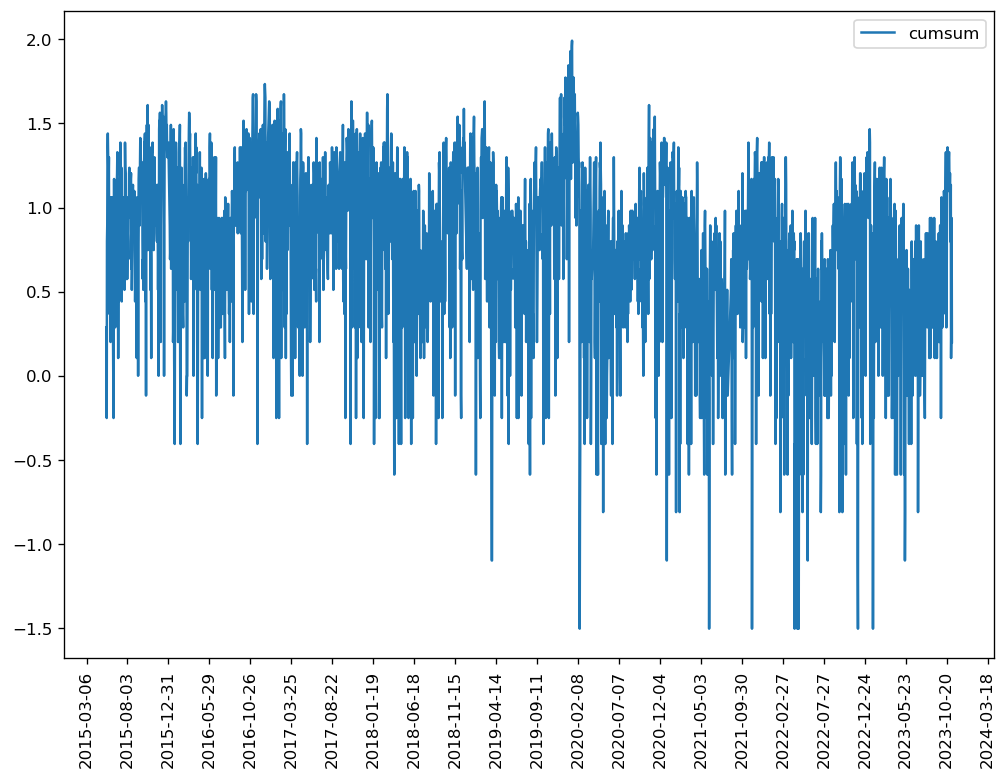

In [37]:
btu_df_ratio['log_cumsum_no2'] = btu_df_ratio['NO2_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_no2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

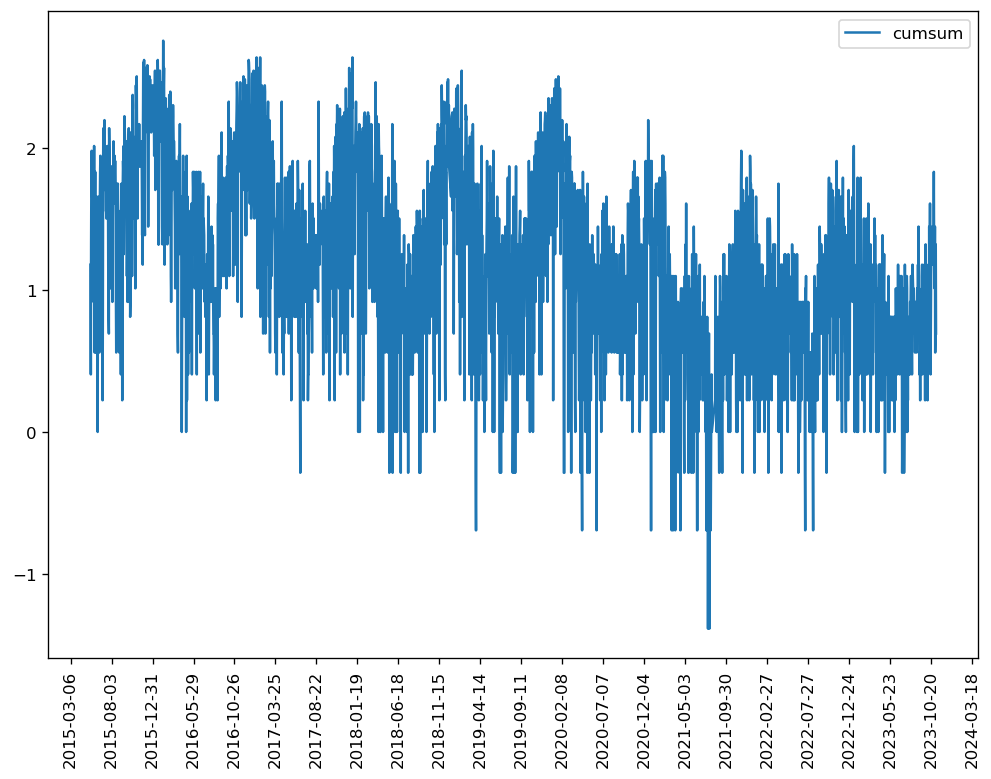

In [38]:
btu_df_ratio['log_cumsum_so2'] = btu_df_ratio['SO2_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_so2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

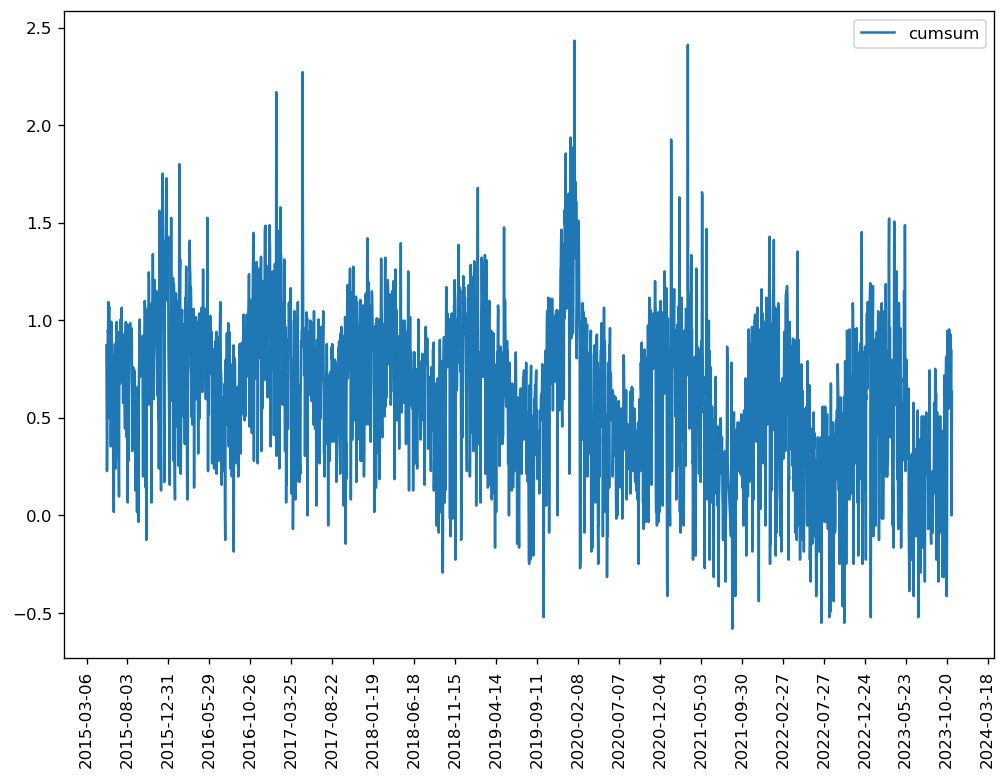

In [39]:
btu_df_ratio['log_cumsum_pm25'] = btu_df_ratio['PM25_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_pm25'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

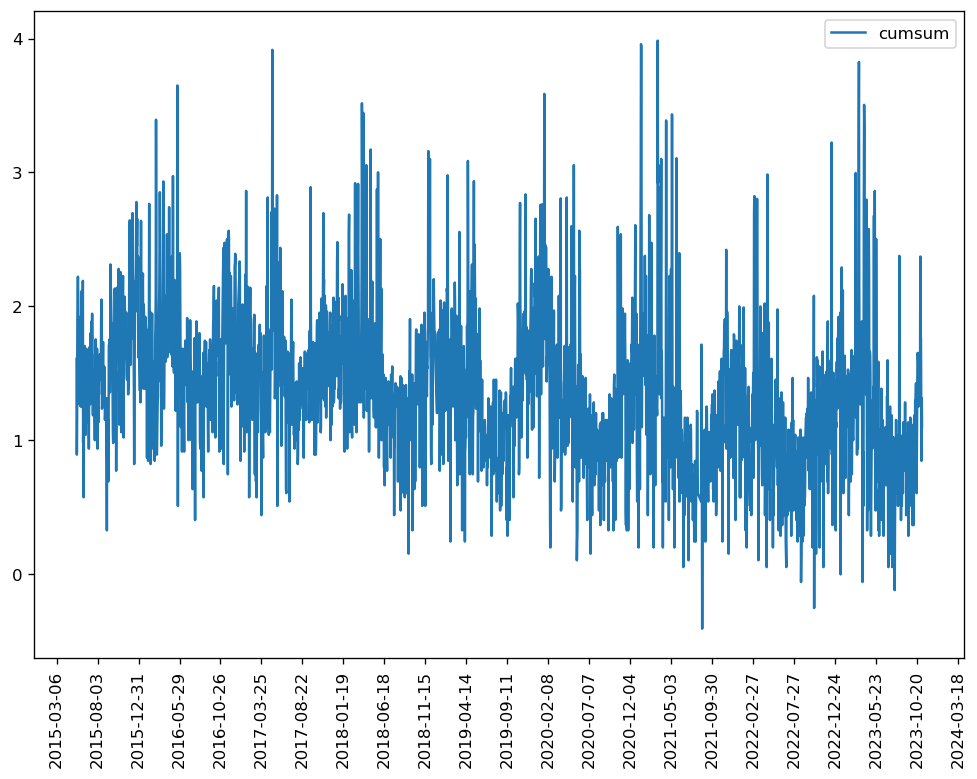

In [40]:
btu_df_ratio['log_cumsum_pm10'] = btu_df_ratio['PM10_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_pm10'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

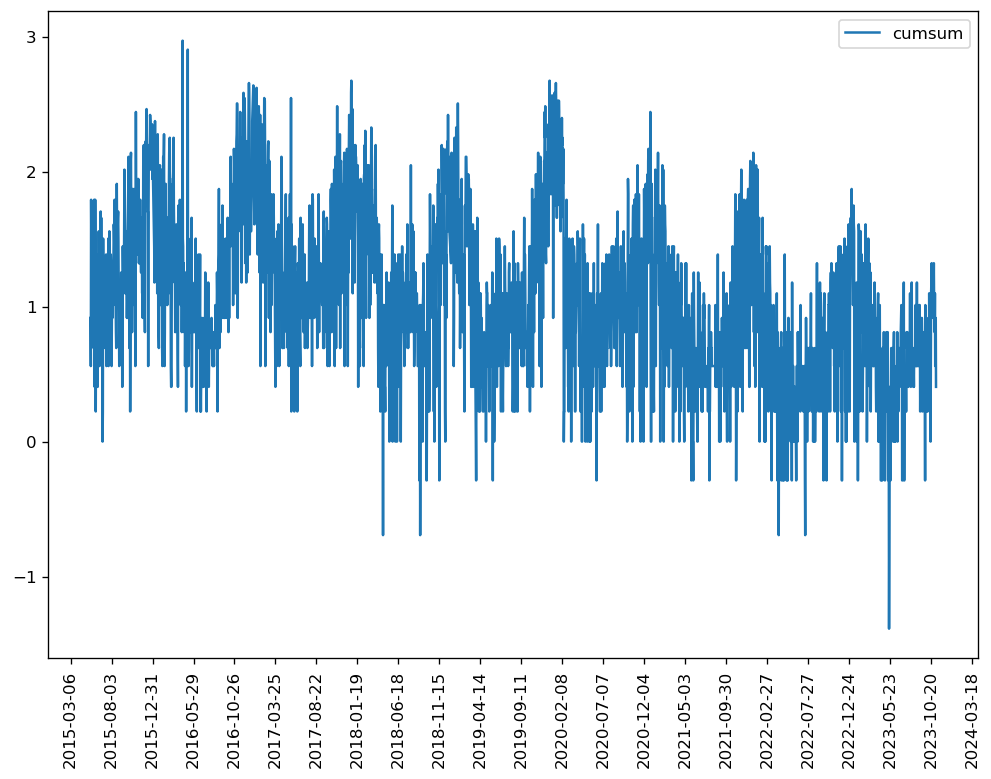

In [41]:
btu_df_ratio['log_cumsum_co'] = btu_df_ratio['CO_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_co'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

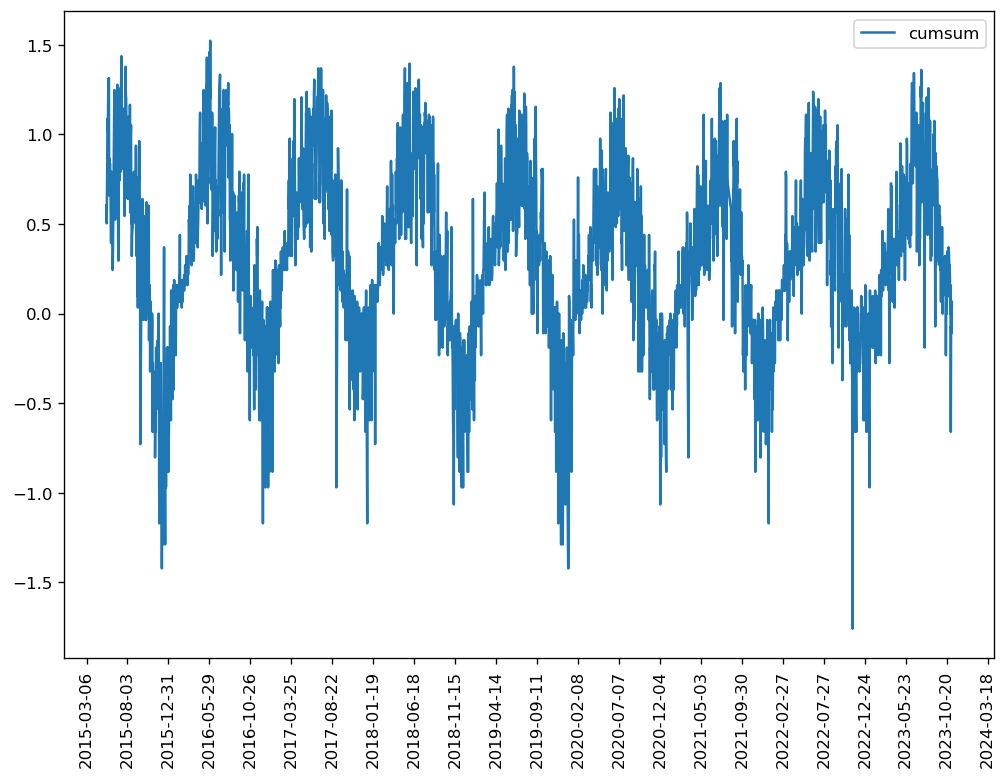

In [42]:
btu_df_ratio['log_cumsum_o3'] = btu_df_ratio['O3_ratio'].cumsum()
plt.plot(btu_df_ratio['date'] ,btu_df_ratio['log_cumsum_o3'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

# Eliminating Trend and Seasonality

If we eliminate trend and seasonality, we can observe clear volatility clustering. This is reasonable given the nature of air pollutants: government policies often have multi-year effects, weather patterns remain relatively stable within a season, and most decisions that impact air quality tend to have long-term consequences.

In [43]:
!pip install arch

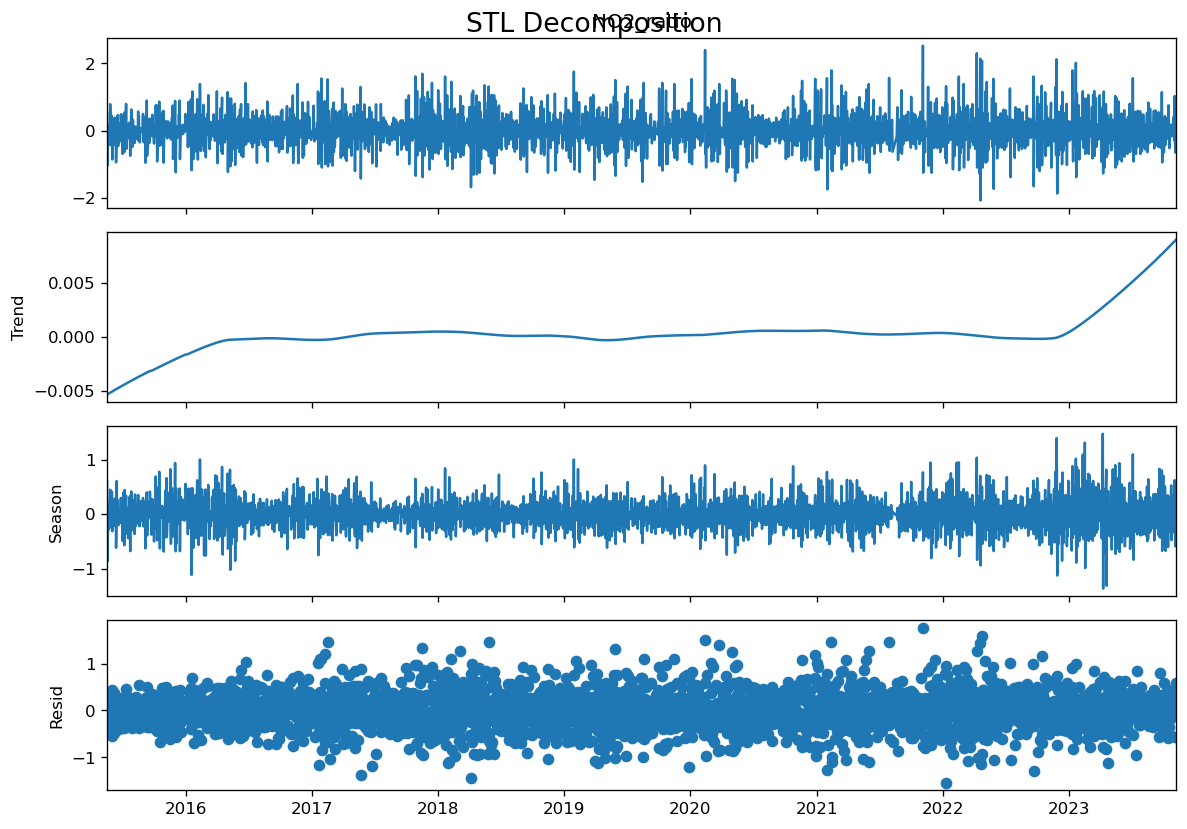

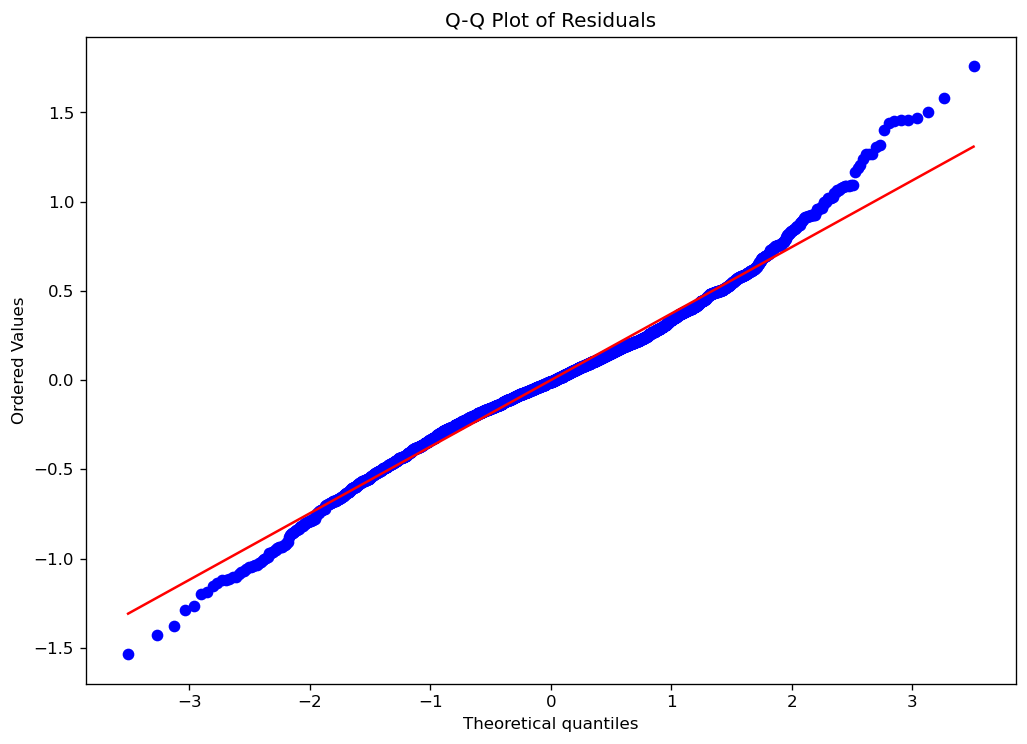

Shapiro-Wilk Test statistic=0.9857, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import shapiro, probplot

btu_df_ratio['date'] = pd.to_datetime(btu_df_ratio['date'])
btu_df_ratio = btu_df_ratio.sort_values('date')
btu_df_ratio.set_index('date', inplace=True)

df = btu_df_ratio.copy()


stl = STL(df['NO2_ratio'], period=365) 
res_NO2 = stl.fit()

res_NO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_NO2 = res_NO2.resid.dropna()

# Q-Q Plot
probplot(residuals_NO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_NO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1200.76
Distribution:      Standardized Student's t   AIC:                           2411.53
Method:                  Maximum Likelihood   BIC:                           2441.65
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:25   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

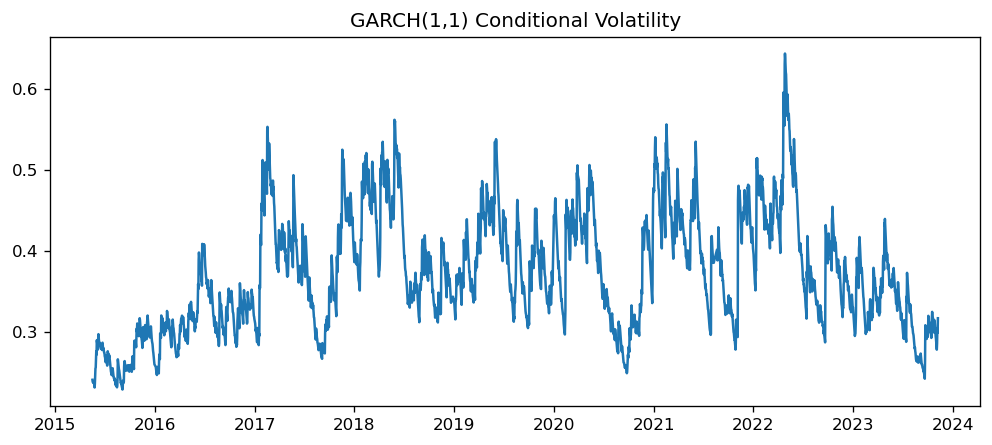

In [45]:
from arch import arch_model
import matplotlib.pyplot as plt

# residuals
residuals_NO2 = res_NO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_NO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

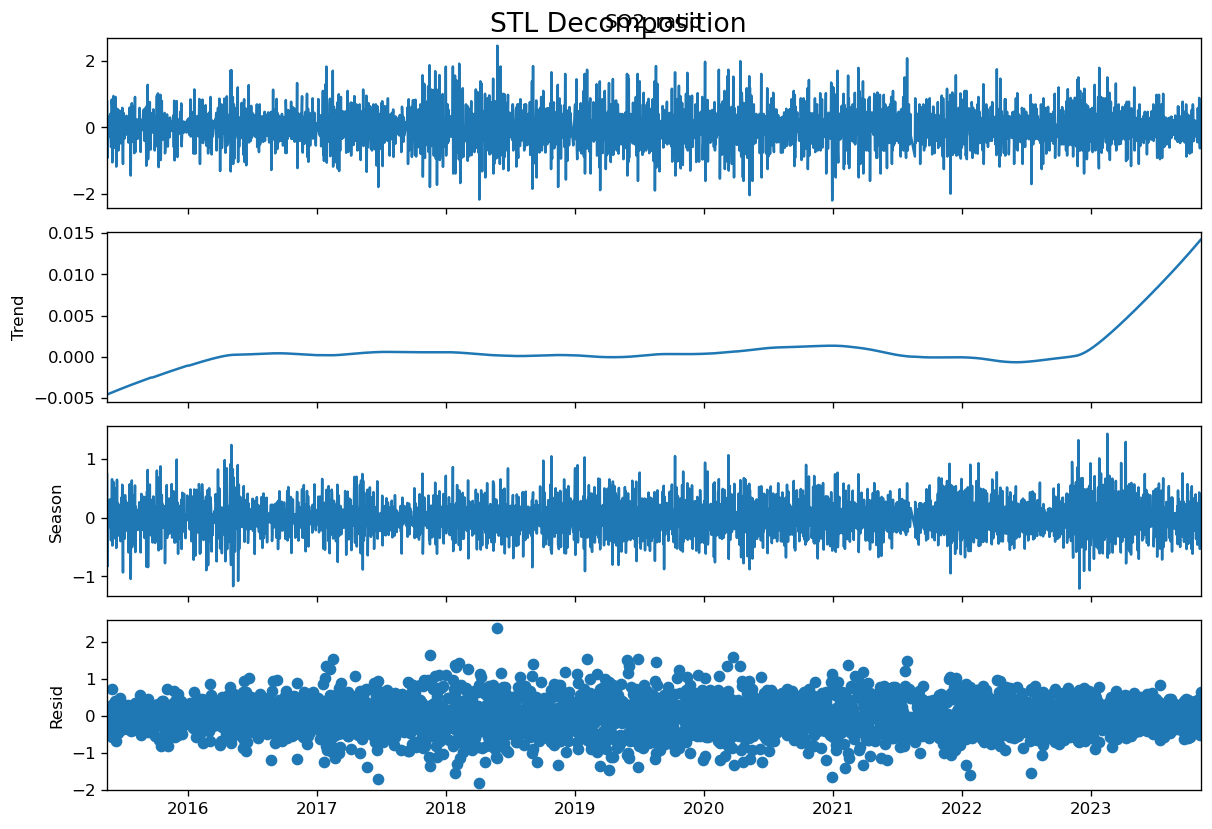

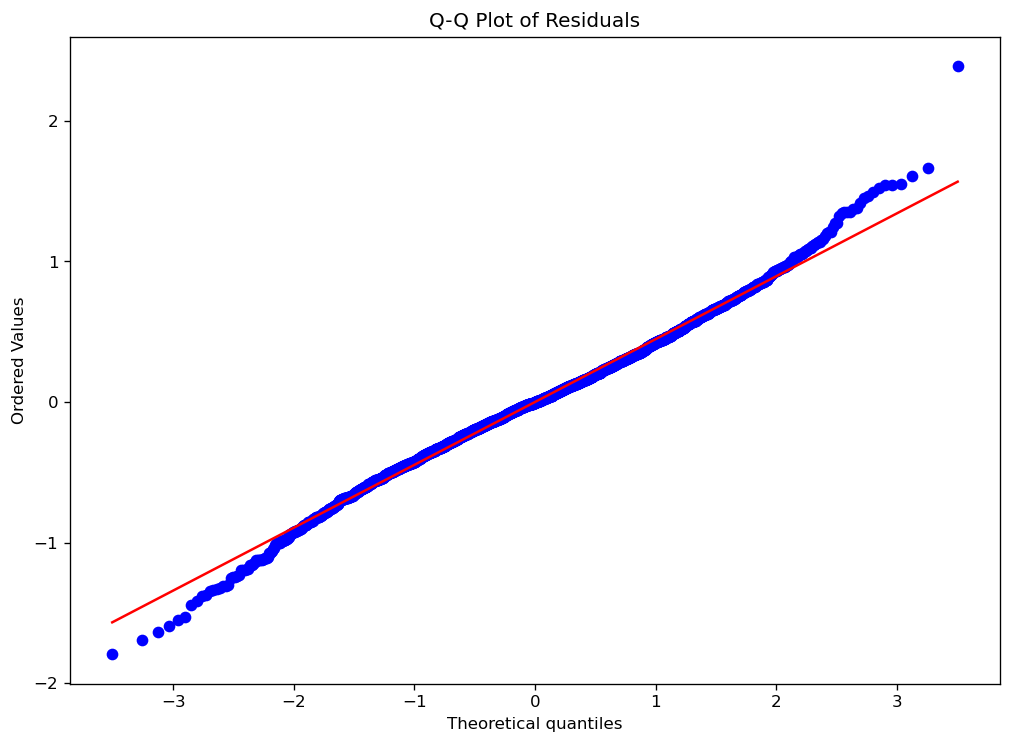

Shapiro-Wilk Test statistic=0.9935, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1742.80
Distribution:      Standardized Student's t   AIC:                           3495.60
Method:                  Maximum Likelihood   BIC:                           3525.73
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:27   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

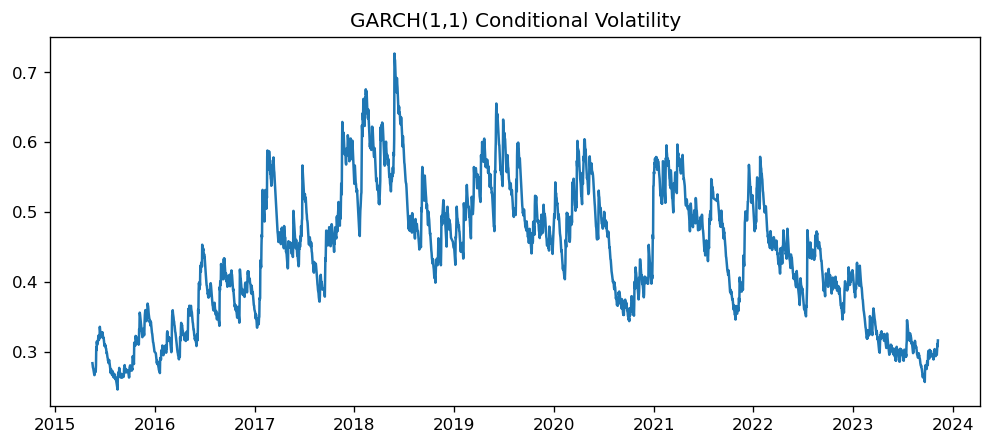

In [46]:
stl = STL(df['SO2_ratio'], period=365) 
res_SO2 = stl.fit()

res_SO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_SO2 = res_SO2.resid.dropna()

# Q-Q Plot
probplot(residuals_SO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_SO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_SO2 = res_SO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_SO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

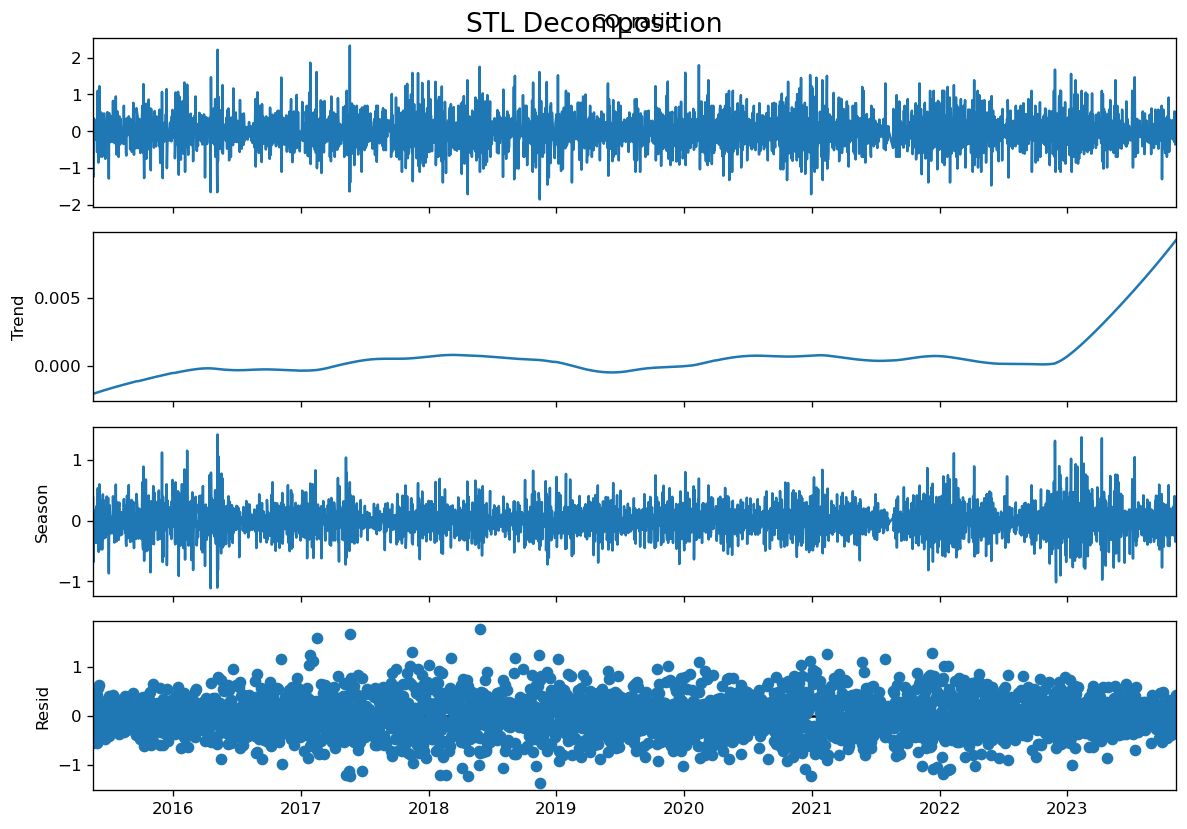

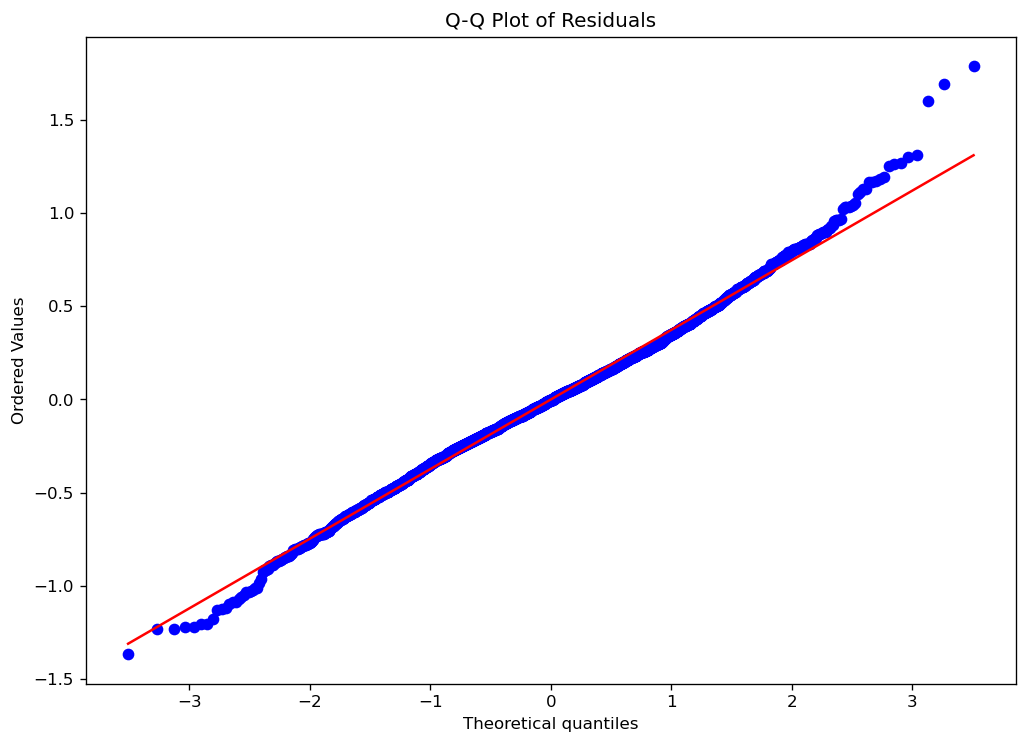

Shapiro-Wilk Test statistic=0.9942, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1233.23
Distribution:      Standardized Student's t   AIC:                           2476.45
Method:                  Maximum Likelihood   BIC:                           2506.58
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:29   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

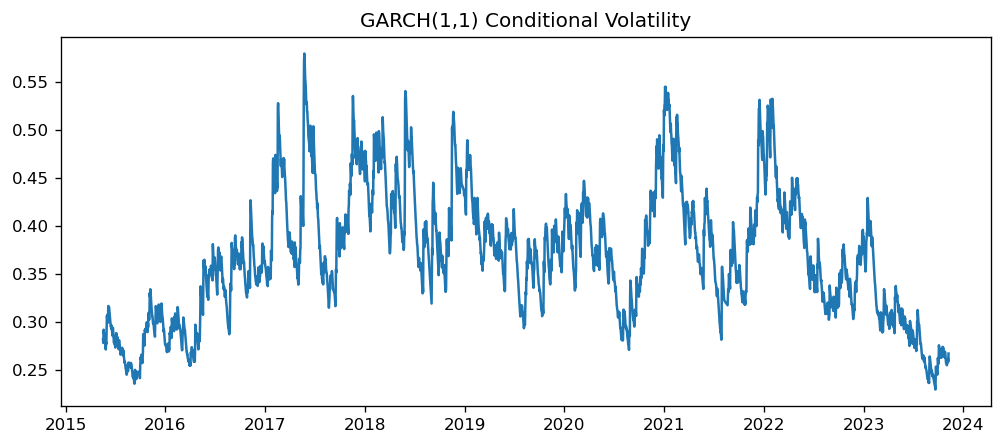

In [47]:
stl = STL(df['CO_ratio'], period=365) 
res_CO = stl.fit()

res_CO.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_CO = res_CO.resid.dropna()

# Q-Q Plot
probplot(residuals_CO, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_CO)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_CO = res_CO.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_CO, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

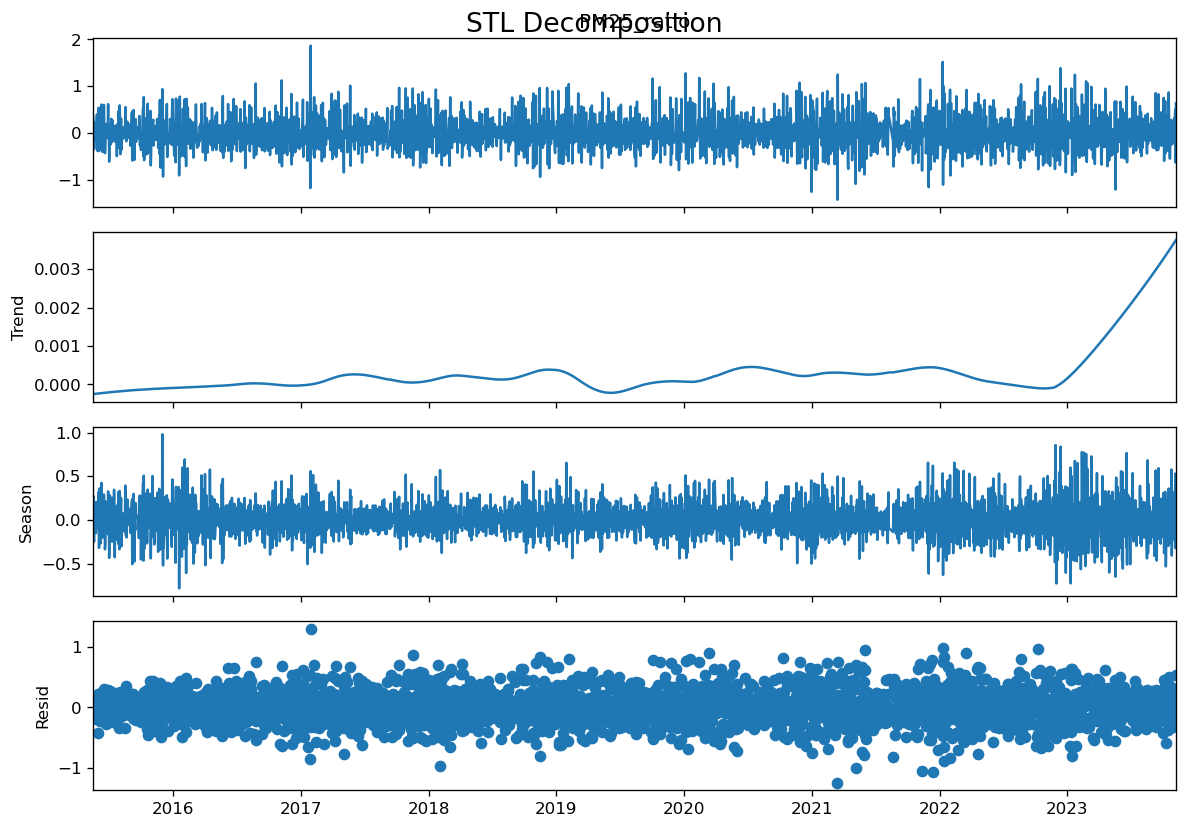

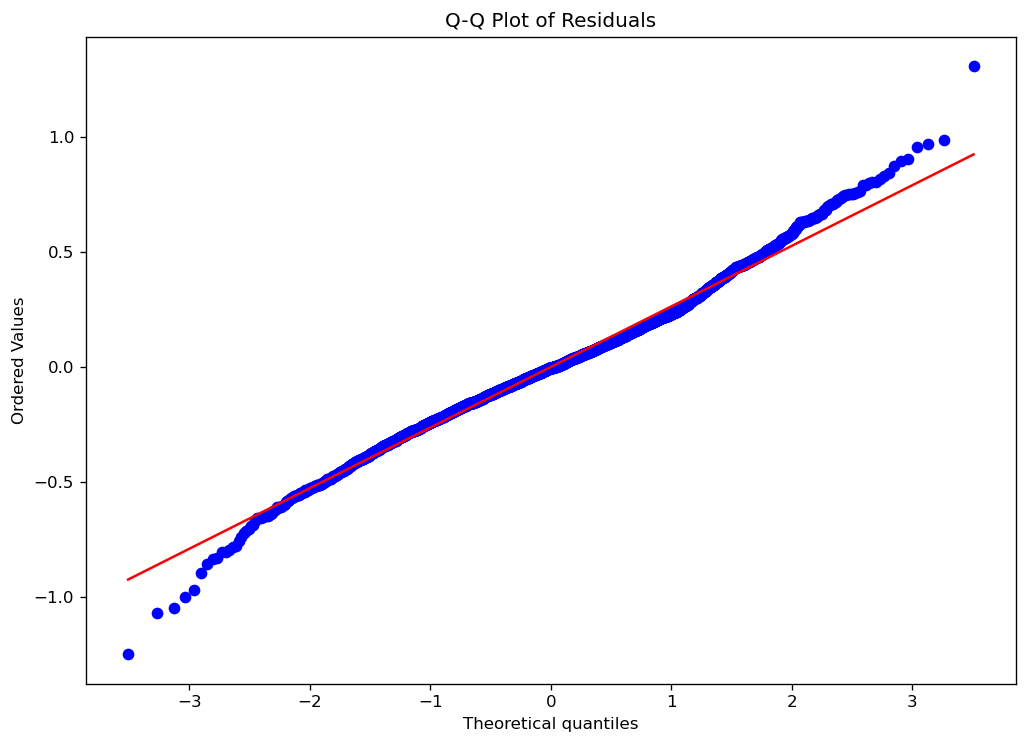

Shapiro-Wilk Test statistic=0.9902, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7198.90
Distribution:      Standardized Student's t   AIC:                           14407.8
Method:                  Maximum Likelihood   BIC:                           14437.9
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:31   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      

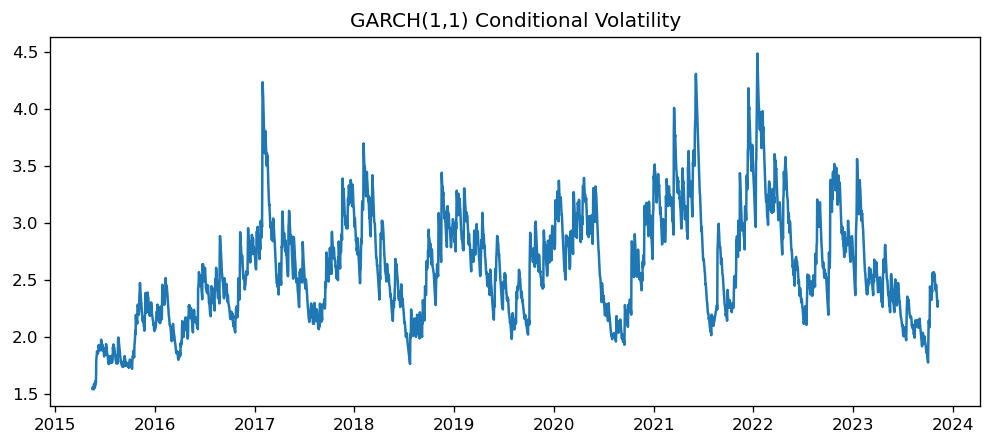

In [48]:
stl = STL(df['PM25_ratio'], period=365) 
res_PM25 = stl.fit()

res_PM25.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM25 = res_PM25.resid.dropna()

# Q-Q Plot
probplot(residuals_PM25, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM25)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM25 = res_PM25.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM25, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

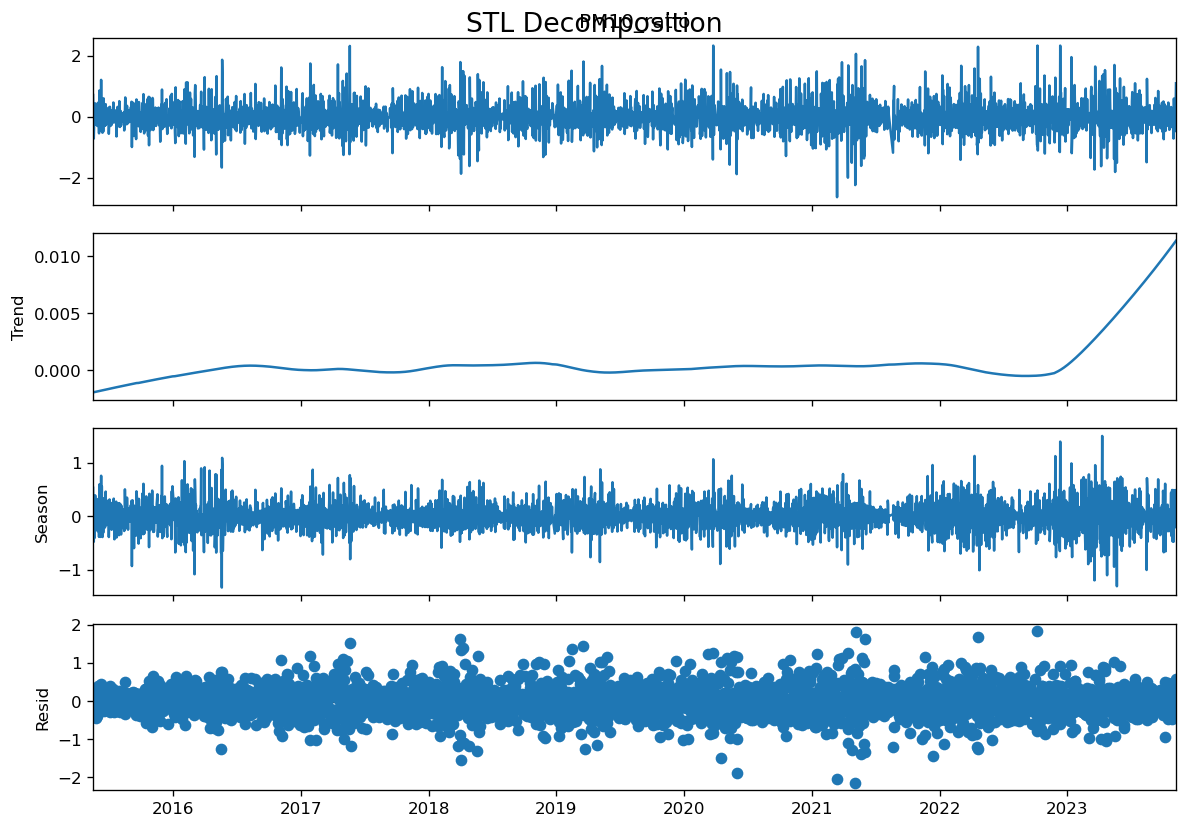

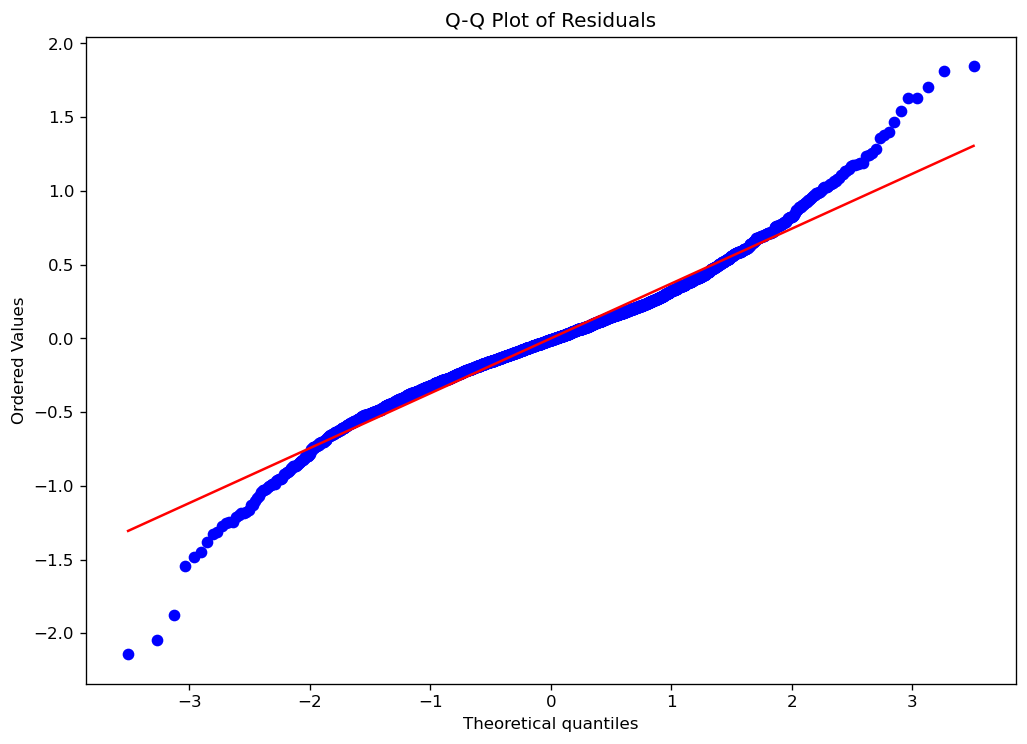

Shapiro-Wilk Test statistic=0.9727, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1142.32
Distribution:      Standardized Student's t   AIC:                           2294.63
Method:                  Maximum Likelihood   BIC:                           2324.76
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:33   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

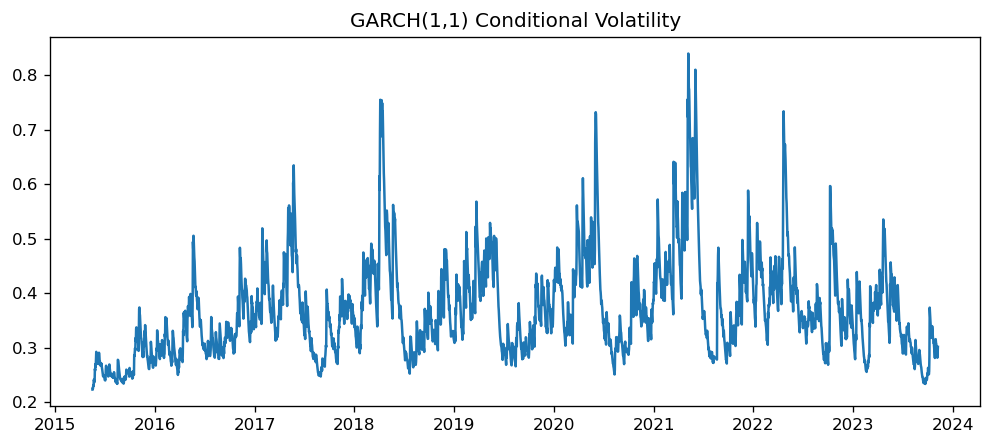

In [49]:
stl = STL(df['PM10_ratio'], period=365) 
res_PM10 = stl.fit()

res_PM10.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM10 = res_PM10.resid.dropna()

# Q-Q Plot
probplot(residuals_PM10, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM10)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM10 = res_PM10.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM10, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

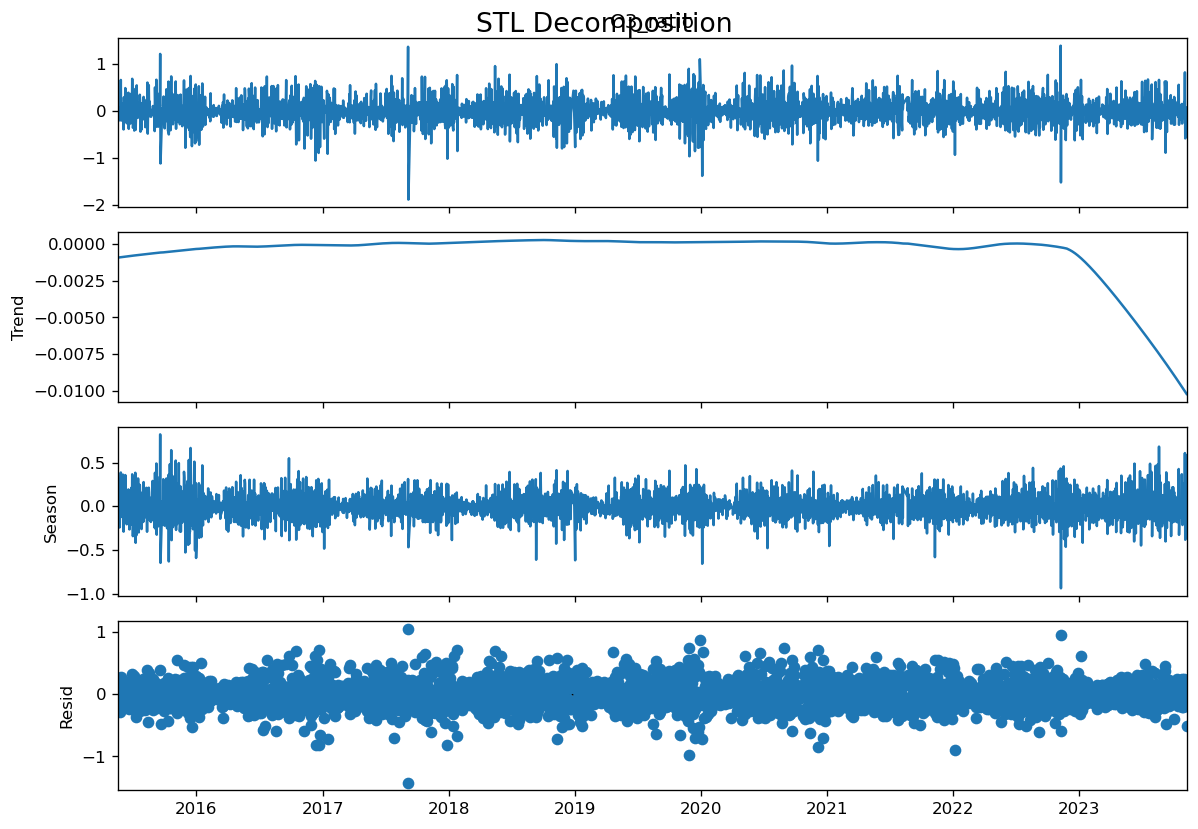

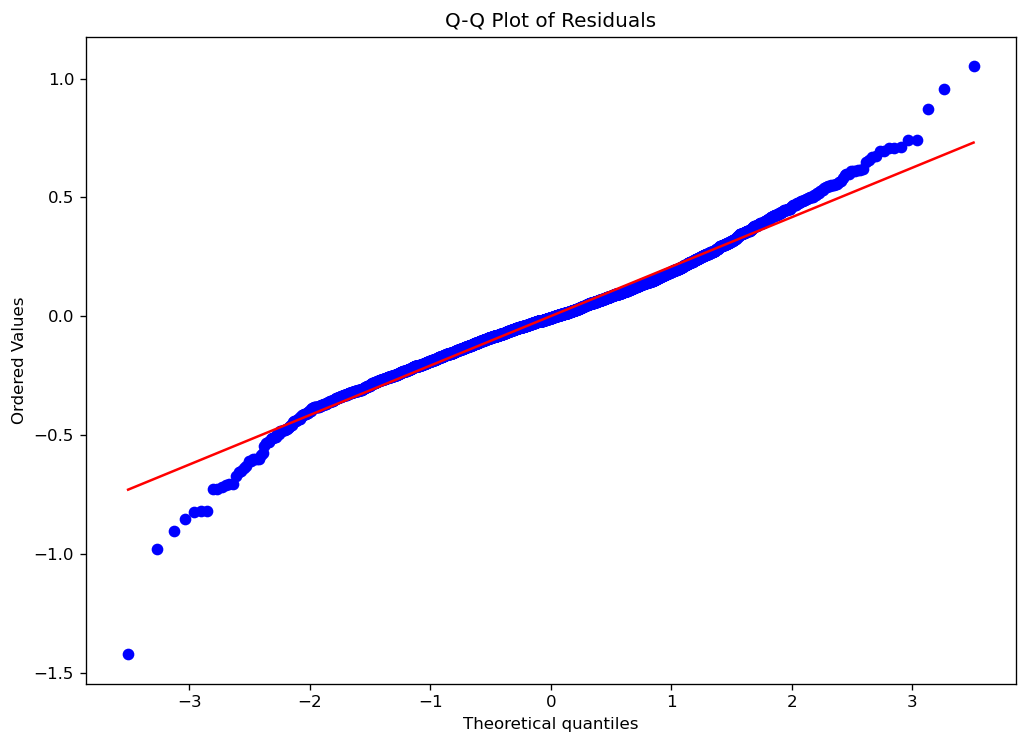

Shapiro-Wilk Test statistic=0.9818, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6405.55
Distribution:      Standardized Student's t   AIC:                           12821.1
Method:                  Maximum Likelihood   BIC:                           12851.2
                                              No. Observations:                 3057
Date:                      Fri, Jul 11 2025   Df Residuals:                     3056
Time:                              02:14:35   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

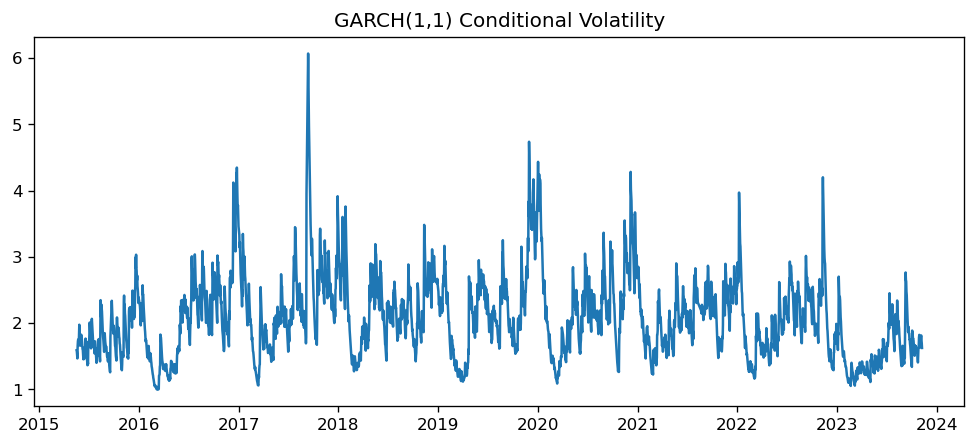

In [50]:
stl = STL(df['O3_ratio'], period=365) 
res_O3 = stl.fit()

res_O3.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_O3 = res_O3.resid.dropna()

# Q-Q Plot
probplot(residuals_O3, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_O3)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_O3 = res_O3.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_O3, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()